<h1> Introductory Econometrics in Python

**Table of Content**
- Simple Regression with Cross-sectional Data
- Multiple Regression with cross-sectioal Data, including Inference and Hypothesis testing
- ***Binary Dependent Variables***
- Regression Analysis with Panel Data
- Estimation of Treatment Effects: Difference-in-difference Analysis 

***Binary Dependent Variables***
1. Linear Probability Model (incl.Heteroskedasticity and robust inference)
2. Logit and Probit (incl Partial Effects)

<h3>A Binary Dependent Variable: The Linear Probability Model</h3>

So far:

- We have learned much about the properties and applicability of the multiple linear regression model.
- We studied how, through the use of binary independent variables, we can incorporate qualitative information as explanatory variables in a multiple regression model.
- In all of the models up until now: the dependent variable $y$ has had quantitative meaning (for example, $y$ is a dollar amount, a percentage, or the logs of these).


What happens if we want to use multiple regression to explain a qualitative event?

**The Linear Probability Model**

- Simplest case:
    - The event we would like to explain is a binary outcome.
    - Often the case in practice
- In other words: our dependent variable, $y$, takes on only two values: zero and one.
- For example:
    - $y$ can be defined to indicate whether an adult has a high school education;
    - $y$ can indicate whether a college student used illegal drugs during a given school year;
    - or $y$ can indicate whether a firm was taken over by another firm during a given year.

**The Linear Probability Model**

- In each of these examples, we can let $y=1$ denote one of the outcomes and $y=0$ the other outcome.
- What does it mean to write down a multiple regression model, such as

\begin{equation*}
y=\beta_0+\beta_1x_1+...+\beta_kx_k+u,
\end{equation*}

when $y$ is a binary variable?
- Because $y$ can take on only two values, $\beta_j$ cannot be interpreted as the change in $y$ given a one-unit increase in $x_j$, holding all other factors fixed: $y$ either changes from zero to one or from one to zero (or does not change).
- Nevertheless, the $\beta_j$still have useful interpretations.
- If we assume that the zero conditional mean assumption holds, that is, $E(u|x_1,...,x_k)=0$, then we have, as always,

\begin{equation*}
E(y|\mathbf{x})=\beta_0+\beta_1x_1+...+\beta_kx_k+u,
\end{equation*}

where **x** is shorthand for all of the explanatory variables.


**The Linear Probability Model**

The key point is that when $y$ is a binary variable taking on the values zero and one, it is always true that: $P(y=1|\mathbf{x})=E(y|\mathbf{x})$: 
- the probability of "success" — that is, the probability that $y=1$ — is the same as the expected value of $y$.

Thus, we have the important equation

\begin{equation*}
P(y=1|\mathbf{x})=\beta_0+\beta_1x_1+...+\beta_kx_k+u,
\end{equation*}

which says that the probability of success, say, $p(\mathbf{x})=P(y=1|\mathbf{x})$, is a linear function of the $x_j$.

- Such a model is called **binary response model**, and $P(y=1|\mathbf{x})$ is also called the **response probability**
- Because probabilities must sum to one, $P(y=0|\mathbf{x})=1-P(y=1|\mathbf{x})$ is also a linear function of the $x_j$.

**The Linear Probability Model**

- The multiple linear regression model with a binary dependent variable is called the **linear probability model (LPM)** because the response probability is linear in the parameters $\beta_j$.
- In the LPM, $\beta_j$ measures the change in the probability of success when $x_j$ changes, holding other factors fixed:

\begin{equation*}
\Delta P(y=1|\mathbf{x})=\beta_j\Delta x_j.
\end{equation*}


- With this in mind, the multiple regression model can allow us to estimate the effect of various explanatory variables on qualitative events.
- The mechanics of OLS are the same as before.
If we write the estimated equation as

\begin{equation*}
\hat{y}=\hat{\beta}_0+\hat{\beta}_1x_1+...+\hat{\beta}_kx_k+u,
\end{equation*}

we must now remember that $\hat{y}$ is the predicted probability of success.
- Therefore, $\hat{\beta}_0$ is the predicted probability of success when each $x_j$ is set to zero, which may or may not be interesting.
- The slope coefficient $\hat{\beta}_1$ measures the predicted change in the probability of success when $x_1$ increases by one unit.

**Example: Married Women's Labor Force Participation**

Let's study the probability that a woman is in the labor force (_inlf_) depending on socio-demographic characteristics such as husband's earnings (_nwifeinc_, in thousands of dollars), the years of education, age, experience, the number of kids younger than  6 or between 6 and 18.
The script below estimates a linear probability model using the data set `mroz`.
How do we interpret the coefficient of _educ_?

In [1]:
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf

mroz = woo.dataWoo('mroz')

# estimate linear probability model:
reg_lin = smf.ols(formula='inlf ~ nwifeinc + educ + exper +'
                          'I(exper**2) + age +C(kidslt6) + kidsge6',
                  data=mroz)
results_lin = reg_lin.fit()

# print regression table:
table = pd.DataFrame({'b': round(results_lin.params, 4),
                      'se': round(results_lin.bse, 4),
                      't': round(results_lin.tvalues, 4),
                      'pval': round(results_lin.pvalues, 4)})
print(f'table: \n{table}\n')

#mroz.describe()

table: 
                      b      se       t    pval
Intercept        0.5921  0.1556  3.8051  0.0002
C(kidslt6)[T.1] -0.2713  0.0476 -5.7009  0.0000
C(kidslt6)[T.2] -0.5454  0.0897 -6.0789  0.0000
C(kidslt6)[T.3] -0.5806  0.2521 -2.3032  0.0215
nwifeinc        -0.0036  0.0015 -2.4449  0.0147
educ             0.0382  0.0074  5.1703  0.0000
exper            0.0395  0.0057  6.9125  0.0000
I(exper ** 2)   -0.0006  0.0002 -3.2196  0.0013
age             -0.0162  0.0025 -6.4737  0.0000
kidsge6          0.0131  0.0132  0.9901  0.3225



**The Linear Probability Model**

- The LPM is easy to interpret
- But: let's have a look at the fitted values:

In [2]:
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf

mroz = woo.dataWoo('mroz')

# estimate linear probability model:
reg_lin = smf.ols(formula='inlf ~ nwifeinc + educ + exper +'
                          'I(exper**2) + age + kidslt6 + kidsge6',
                  data=mroz)
results_lin = reg_lin.fit()

mroz['inlf_hat'] = results_lin.fittedvalues

#display(mroz.loc[mroz['inlf_hat']<0,'inlf_hat'].describe())
#display(mroz.loc[mroz['inlf_hat']>1,'inlf_hat'].describe())
#display(mroz['inlf_hat'].quantile([.01, 0.05, 0.1, .25, .5, .75, .9]))

plt.hist(mroz['inlf_hat'], bins=25)


mroz=mroz.sort_values('inlf_hat')

#display(mroz.head())
#display(mroz.tail())


NameError: name 'plt' is not defined

**The Linear Probability Model**

- Thus, if we plug certain combinations of values for the independent variables, we can get predictions either less than zero or greater than one.
- Since these are predicted probabilities, and probabilities must be between zero and one, this can be a little embarrassing.
- For example, what would it mean to predict that a woman is in the labor force with a probability of –.10?
- In fact, of the 753 women in the sample, 16 of the fitted values  are less than zero, and 17 of the fitted values are greater than one.
- A related problem is that a probability cannot be linearly related to the independent variables for all their possible values as pribabilities are bound between 0 and 1.
- For example, our model predicts that the effect of going from zero children to one young child reduces the probability of working by .262.
- This is also the predicted drop if the woman goes from having one young child to two.
- It seems more realistic that the first small child would reduce the probability by a large amount, but subsequent children would have a smaller marginal effect.


**The Linear Probability Model**

- Even with these problems, the linear probability model is useful and often applied in economics.
- It usually works well for values of the independent variables that are near the averages in the sample.
- In the labor force participation example, over 96% of the women have either no young children or one small child, and so we should probably restrict attention to this case when interpreting the estimated equation.
- Predicted probabilities outside the unit interval are a little troubling when we want to make predictions.
- Still, there are ways to use the estimated probabilities (even if some are negative or greater than one) to predict a zero-one outcome.
- As before, let $\hat{y}_i$ denote the fitted values — which may not be bounded between zero and one.
- Define a predicted value as  1 if  $\hat{y}_i>0.5$ and as 0 if $\hat{y}_i<0.5$ 
- Now we have a set of predicted values, that are either zero or one.
- We can use these data to obtain the frequencies with which we correctly predict $y_i=0$ and $y_i=1$ as well as the proportion of overall correct predictions.
- The latter measure, when turned into a percentage, is a widely used goodness-of-fit measure for binary dependent variables: the **percent correctly predicted**.

**The Linear Probability Model**

- Due to the binary nature of $y$, the linear probability model does violate one of our main assumptions.
- When $y$ is a binary variable, its variance, conditional on $x$, is

\begin{equation*}
Var(y|\mathbf{x})=p(\mathbf{x})[1-p(\mathbf{x})],
\end{equation*}

- This means that, except in the case where the probability does not depend on any of the independent variables, there must be heteroskedasticity in a linear probability model.
- We know that this does not cause bias in the OLS estimators of the $\beta_j$.
- However, homoskedasticity is crucial for justifying the usual $t$ statistics, even in large samples.
- Because the standard errors are not generally valid, we should use them with caution.
- We will next show how to correct the standard errors for heteroskedasticity.
- It turns out that, in many applications, the usual OLS statistics are not far off, and it is still acceptable in applied work to present a standard OLS analysis of a linear probability model.

<h3>Heteroskedasticity and Heteroskedasticity-Robust Inference after OLS Estimation</h3>

- The homoskedasticity assumption, introduced earlier for multiple regression, states that the variance of the unobserved error, $u$, conditional on the explanatory variables, is constant.
- Homoskedasticity fails whenever the variance of the unobserved factors changes across different segments of the population, where the segments are determined by the different values of the explanatory variables.
- For example:
    - in a savings equation, heteroskedasticity is present if the variance of the unobserved factors affecting savings increases with income.
- However: homoskedasticity is needed to justify the usual t tests and confidence intervals for OLS estimation of the linear regression model, even with large sample sizes.

**Heteroskedasticity-Robust Inference after OLS Estimation**

- Fortunately, it is possible to adjust standard errors and t statistics so that they are valid in the presence of **heteroskedasticity of unknown form**.
- This is very convenient because it means we can report new statistics that work regardless of the kind of heteroskedasticity present in the population.
- This is known as **heteroskedasticity-robust procedures** because they are valid—at least in large samples—whether or not the errors have constant variance, and we do not need to know which is the case.
- A careful derivation of the theory is well beyond the scope of this lecture, but the application of heteroskedasticity-robust methods is very easy now because many statistics and econometrics packages compute these statistics as an option.
- In _Python_ we can simply use `cov_type='HC3'` in the `fit` function to get **heteroskedasticity-robust standard errors**
- However, in empirical work, using robust standrad errors is the default, so you usually don't test and just use robust inference to get more conservative estimates.


In [2]:
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

mroz = woo.dataWoo('mroz')

# estimate linear probability model:
reg_lin = smf.ols(formula='inlf ~ nwifeinc + educ + exper +'
                          'I(exper**2) + age + kidslt6 + kidsge6',
                  data=mroz)
results_lin = reg_lin.fit()

reg_lin_rob = smf.ols(formula='inlf ~ nwifeinc + educ + exper +'
                          'I(exper**2) + age + kidslt6 + kidsge6',
                  data=mroz)
results_lin_rob = reg_lin_rob.fit(cov_type='HC3')

output = summary_col([results_lin, results_lin_rob],stars=True,float_format='%0.6f',
                  model_names=['not robust\n(1)','robust\n(2)'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})
print(output)



               not robust     robust   
                  (1)          (2)     
---------------------------------------
Intercept     0.585519***  0.585519*** 
              (0.154178)   (0.153580)  
nwifeinc      -0.003405**  -0.003405** 
              (0.001448)   (0.001558)  
educ          0.037995***  0.037995*** 
              (0.007376)   (0.007340)  
exper         0.039492***  0.039492*** 
              (0.005673)   (0.005984)  
I(exper ** 2) -0.000596*** -0.000596***
              (0.000185)   (0.000199)  
age           -0.016091*** -0.016091***
              (0.002485)   (0.002415)  
kidslt6       -0.261810*** -0.261810***
              (0.033506)   (0.032152)  
kidsge6       0.013012     0.013012    
              (0.013196)   (0.013660)  
N             753          753         
R2            0.26         0.26        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


**Logit and Probit Models for Binary Response**

- The linear probability model is simple to estimate and use, but it has the mentioned drawbacks.
- The two most important disadvantages are that the fitted probabilities can be less than zero or greater than one and the partial effect of any explanatory variable (appearing in level form) is constant.
- These limitations of the LPM can be overcome by using more purposeful binary response models.
- **Probit** and **logit** regression are nonlinear regression models specifically designed for binary dependent variables.
- Because a regression with a binary dependent variable $Y$ models the probability that $Y = 1$, it makes sense to adopt a nonlinear formulation that forces the predicted values to be between 0 and 1.
- Because cumulative probability distribution functions (c.d.f.’s) produce probabilities between 0 and 1, they are used in logit and probit regressions.
- Probit regression uses the standard normal c.d.f.
- Logit regression, also called **logistic regression**, uses the logistic c.d.f.

**Probit Regression**

- The probit regression model with a single regressor $x$ is

\begin{equation*}
Pr(y=1|x)=\Phi(\beta_0+\beta_1x)
\end{equation*}

where $\Phi$ is the cumultive standard normal distribution function.

- Assume we have $\beta_0=-2$ and $\beta_1=3$ and $x=0.3$: we get $\Phi(-1.1)$
- According to the cumulative distribution we have $\Phi(-1.1)=Pr(Z\neq-1.1)=13.57\%$ (these values can be found in tables for the cumulative normal distribution).
- Thus, when $x=0.3$ the predicted probability that $y=1$ is 13.57% in this case.



**Cumulative normal distribution table**
<br>  


<center><img src="figs/sw_cnd.png" width="500"/> 
    

<p>

**Probit Model Illustration**  

When there is just one regressor, the predicted probability can be plotted as a function of $x$. 

<br>  


<center><img src="figs/sw_probit.png" width="500"/> 
    

<p>

**Probit Regression**

- Although the effect of $x$ on the z-value is linear, its effect on the probability is nonlinear.
- Thus in practice the easiest way to interpret the coefficients of a probit model is to compute the predicted probability,or the change in the predicted probability, for one or more values of the regressors.
- This is the same method we used before when we analyzed non-linear effects (interaction terms, polynomials).
- This method always works for computing predicted effects of a change in $x$, no matter how complicated the nonlinear model.
- The probit model parameters are estimated using the Maximum Likelihood Estimation (MLE) method, which we won't cover here formally.
- Because the MLE is normally distributed in large samples, statistical inference about the probit and logit coefficients based on the MLE proceeds in the same way as inference about the linear regression function coefficients based on the OLS estimator.

**Logit Regression**

- The logit regression model is similar to the probit regression model except that the cumulative standard normal distribution function $\Phi$ is replaced by the cumulative standard logistic distribution function, denoted $F$
- The logistic cumulative distribution function has a specific functional form, defined in terms of the exponential function:

\begin{equation*}
Pr(Y=1|x_1,x_2,...,x_k)=F(\beta_0+\beta_1x_1+...+\beta_kx_k)=\frac{1}{1+e^{-(\beta_0+\beta_1x_1+...+\beta_kx_k)}}
\end{equation*}

and 

\begin{equation*}
Pr(Y=0|x_1,x_2,...,x_k)=F(\beta_0+\beta_1x_1+...+\beta_kx_k)=\frac{1}{1+e^{(\beta_0+\beta_1x_1+...+\beta_kx_k)}}
\end{equation*}

- As with probit, the logit coefficients are best interpreted by computing predicted probabilities and differences in predicted probabilities.
- The coefficients of the logit model can also be estimated by maximum likelihood.
- The maximum likelihood estimator is consistent and normally distributed in large samples, so t-statistics and confidence intervals for the coefficients can be constructed in the usual way.
- The logit and probit regression functions are similar and the differences between the two functions are small.

**Using Discrete Choice Models in Python**

- In `statsmodels`, many generalized linear models can be estimated with already implemented routines working similar as `ols`.
- Two of them that we will need are:
     - `logit` for the logit model and
     - `probit` for the probit model.
- Maximum likelihood estimation (MLE) of the parameters is done automatically and the `summary` of the results contains the regression table and additional information.

In [3]:
import wooldridge as woo
import statsmodels.formula.api as smf

mroz = woo.dataWoo('mroz')

# estimate logit model:
reg_logit = smf.logit(formula='inlf ~ nwifeinc + educ + exper +'
                              'I(exper**2) + age + kidslt6 + kidsge6',
                      data=mroz)

# disp = 0 avoids printing out information during the estimation:
results_logit = reg_logit.fit(disp=0)
print(f'results_logit.summary(): \n{results_logit.summary()}\n')


# McFadden's pseudo R2:
print(f'results_logit.prsquared: {results_logit.prsquared}\n')


mroz['inlf_hat_logit'] = results_logit.fittedvalues


results_logit.summary(): 
                           Logit Regression Results                           
Dep. Variable:                   inlf   No. Observations:                  753
Model:                          Logit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Mon, 20 Sep 2021   Pseudo R-squ.:                  0.2197
Time:                        17:53:42   Log-Likelihood:                -401.77
converged:                       True   LL-Null:                       -514.87
                                        LLR p-value:                 3.159e-45
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4255      0.860      0.494      0.621      -1.261       2.112
nwifeinc         -0.0213      0.008     -2.535      0.011      -0.038      -0.005
educ          

In [39]:
import wooldridge as woo
import statsmodels.formula.api as smf

mroz = woo.dataWoo('mroz')

# estimate probit model:
reg_probit = smf.probit(formula='inlf ~ nwifeinc + educ + exper +'
                                'I(exper**2) + age + kidslt6 + kidsge6',
                        data=mroz)
results_probit = reg_probit.fit()
print(f'results_probit.summary(): \n{results_probit.summary()}\n')


# McFadden's pseudo R2:
print(f'results_probit.prsquared: {results_probit.prsquared}\n')

Optimization terminated successfully.
         Current function value: 0.532938
         Iterations 5
results_probit.summary(): 
                          Probit Regression Results                           
Dep. Variable:                   inlf   No. Observations:                  753
Model:                         Probit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.2206
Time:                        02:45:26   Log-Likelihood:                -401.30
converged:                       True   LL-Null:                       -514.87
                                        LLR p-value:                 2.009e-45
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2701      0.509      0.531      0.595      -0.727      

**Partial Effects**


- The parameters of linear regression models have straightforward interpretations:
    - $\beta_j$; measures the ceteris paribus effect of $x_j$ on $E(y|\mathbf{x})$
- The parameters of nonlinear models like logit and probit have a less straightforward interpretation since the linear index $\mathbf{x\beta}$ affects $\hat{y}$ non-linearly through its link function. 
- In other words: the partial effects differ by regressor values which makes it harder to present the results in a concise and meaningful way.
- A useful measure of the influence is again the partial effect (APE) (or average marginal effect) which is the slope and has the same interpretation as the parameters in the linear model.


- In Python one can use `get_margeff` to get the average partial effects.
- APEs for the constant are not part of the methods output since they do not have a direct meaningful interpretation.


In [27]:
import wooldridge as woo
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf


mroz = woo.dataWoo('mroz')

# estimate models:
reg_lin = smf.ols(formula='inlf ~ nwifeinc + educ + exper + I(exper**2) +'
                          'age + kidslt6 + kidsge6', data=mroz)
results_lin = reg_lin.fit(cov_type='HC3')

reg_logit = smf.logit(formula='inlf ~ nwifeinc + educ + exper + I(exper**2) +'
                              'age + kidslt6 + kidsge6', data=mroz)
results_logit = reg_logit.fit(disp=0)

reg_probit = smf.probit(formula='inlf ~ nwifeinc + educ + exper + I(exper**2) +'
                                'age + kidslt6 + kidsge6', data=mroz)
results_probit = reg_probit.fit(disp=0)

# automatic average partial effects:
coef_names = np.array(results_lin.model.exog_names)
coef_names = np.delete(coef_names, 0)  # drop Intercept

coeff_LPM = results_lin.params
APE_logit = results_logit.get_margeff().margeff
APE_probit = results_probit.get_margeff().margeff

table_auto = pd.DataFrame({'coef_names': coef_names,
                           'APE_logit': np.round(APE_logit, 4),
                           'APE_probit': np.round(APE_probit, 4), })    
                                                 
print(f'table_auto: \n{table_auto}\n')

# print regression table:
table = pd.DataFrame({'b_ols': round(results_lin.params, 4)})
print(f'table: \n{table}\n')

table_auto: 
      coef_names  APE_logit  APE_probit
0       nwifeinc    -0.0038     -0.0036
1           educ     0.0395      0.0394
2          exper     0.0368      0.0371
3  I(exper ** 2)    -0.0006     -0.0006
4            age    -0.0157     -0.0159
5        kidslt6    -0.2578     -0.2612
6        kidsge6     0.0107      0.0108

table: 
                b_ols
Intercept      0.5855
nwifeinc      -0.0034
educ           0.0380
exper          0.0395
I(exper ** 2) -0.0006
age           -0.0161
kidslt6       -0.2618
kidsge6        0.0130



- If we are interested in the marginal effects of certain values or want to make predictions, we can do this as before when were interested in non-linear effects (e.g quadratic effects) 
- We just have to plug in the values for each $x$
- In the example below we do this for two extreme cases:
    - 1. A woman with 1000.0000 Euro from her family, 5 years of education, 20 years old, 2 kids and no work experience
    - 2. A woman with 0 moneym 17 years education, 30 years of work experience, no kids.
- We can again use `predict` for the predictions.

In [6]:

# predictions for two "extreme" women:
X_new = pd.DataFrame(
    {'nwifeinc': [100, 0], 'educ': [5, 17],
     'exper': [0, 30], 'age': [20, 52],
     'kidslt6': [2, 0], 'kidsge6': [0, 0]})
predictions_lin = results_lin.predict(X_new)
predictions_logit = results_logit.predict(X_new)
predictions_probit = results_probit.predict(X_new)

print(f'predictions_lin: \n{predictions_lin}\n')
print(f'predictions_logit: \n{predictions_logit}\n')
print(f'predictions_probit: \n{predictions_probit}\n')

predictions_lin: 
0   -0.410458
1    1.042808
dtype: float64

predictions_logit: 
0    0.005218
1    0.950049
dtype: float64

predictions_probit: 
0    0.001065
1    0.959870
dtype: float64



The APEs for the other variables don’t differ too much between the models.

Generally, if:
- We are interested in APEs only and not in individual predictions or partial effects
- and as longs as not too many probabilities are close to 0 or 1,
        
then, the linear probability model often works well enough.

<h2>Panel Data Analysis</h2>

- Multiple regression is a powerful tool for controlling for the effect of variables on which we have data.
- If data are not available for some of the variables, however, they cannot be included in the regression
$\rightarrow$ the OLS estimators of the regression coefficients could have omitted variable bias!
        
- We have illustrated the omitting variable bias using simulated data earlier and have shown that the bias could be severe and even switch the sign of the parameters
- Until now, we have covered multiple regression analysis using pure cross-sectional data.
- But: data sets that have both crosssectional and time series dimensions are being used more and more often in empirical research
- Data with cross-sectional and time series aspects allow to control for some types of omitted variables without actually observing them.
- In fact: data with cross-sectional and time series aspects can often shed light on important policy questions
- In this section we will learn how to analyze such data with cross-sectional and time dimension
- Such data are called **panel data** or **longitudinal data**

**Panel Data**

- To collect panel data we follow (or attempt to follow) the same individuals, families, firms, cities, states, or whatever, across time.
- For example, a panel data set on individual wages, hours, education, and other factors is collected by randomly selecting people from a population at a given point in time.
- Then, these same people are reinterviewed at several subsequent points in time.
- This gives us data on wages, hours, education, and so on, for the same group of people in different years.
- Panel data have $T \cdot n$ observations (in the ebst case, when no observation is missing)
    - $T$ is the number of time periods
    - $n$ is the number of entitities
    
- When describing cross-sectional data, it was useful to use a subscript to denote the entity
- For example, $y_i$ referred to the variable $y$ for the $i^{th}$ entity.
- When describing panel data, we need some additional notation to keep track of both the entity and the time period.
- We do so by using two subscripts rather than one:
    - The first, $i$, refers to the entity
    - The second, $t$, refers to the time period of the observation.
    - Thus $y_{it}$ denotes the variable $y$ observed for the $i^{th}$ of $n$ entities in the $t^{th}$ of $T$ periods.

**Panel Data**

- Some additional terminology associated with panel data describes whether some observations are missing.
- A **balanced** panel has all its observations; that is, the variables are observed for each entity and each time period.
- A panel that has some missing data for at least one time period for at least one entity is called an **unbalanced panel**.
- Having an unbalanced panel is not a problem if the missing observations are random, otherwise we have a **selection bias**

**Panel Data**

- But before we start, let's analyze a panel data set without any further knowledge
- Use the dataset 'fatality' on state traffic fatalities

- The dataset is about:



**Example: Traffic Deaths and Alcohol Taxes**:

- There are approximately 40,000 highway traffic fatalities each year in the United States.
- Approximately one-fourth of fatal crashes involve a driver who was drinking, and this fraction rises during peak drinking periods.
- One study (Levitt and Porter,2001) estimates that

    - as many as 25% of drivers on the road between 1 a.m. and 3 a.m. have been drinking
    - and that a driver who is legally drunk is at least 13 times as likely to cause a fatal crash as a driver who has not been drinking.
    
- We aim to study how effective various government policies designed to discourage drunk driving actually are in reducing traffic deaths.
- The panel data set contains variables related to traffic fatalities and alcohol, including

    - the number of traffic fatalities in each state in each year,
    - the type of drunk driving laws in each state in each year,
    - and the tax on beer in each state.
- The measure of traffic deaths we use is the fatality rate, which is the number of annual traffic deaths per 10,000 people in the population in the state.
- The measure of alcohol taxes we use is the "real" tax on a case of beer, which is the beer tax, put into 1988 dollars by adjusting for inflation.

In [97]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

fatality=pd.read_stata('data/fatality.dta')
fatality.head()

,state,year,spircons,unrate,perinc,emppop,beertax,sobapt,mormon,mlda,...,aidall,mraidall,pop,pop1517,pop1820,pop2124,miles,unus,epopus,gspch
0,AL,1982,1.37,14.4,10544.152344,50.692039,1.539379,30.355700,0.32829,19.0,...,309.437988,0.000078,3942002.25,208999.593750,221553.437500,290000.062500,28516.0,9.7,57.799999,-0.022125
1,AL,1988,1.17,7.2,12368.624023,56.834530,1.501444,30.223301,0.43018,21.0,...,298.321991,0.000073,4101992.25,201000.125000,193000.515625,262999.781250,39684.0,5.5,62.300003,0.035392
2,AZ,1982,1.97,9.9,12309.069336,56.893295,0.214797,3.958900,4.91910,19.0,...,173.667999,0.000060,2896996.50,140999.984375,156378.703125,217999.984375,19729.0,9.7,57.799999,-0.043182
3,AZ,1988,1.68,6.3,14408.084961,60.497665,0.346487,3.564000,4.41399,21.0,...,238.233994,0.000068,3488995.00,147999.937500,157000.656250,218000.046875,34247.0,5.5,62.300003,0.026568
4,AR,1982,1.19,9.8,10267.302734,54.475857,0.650358,22.967199,0.32829,21.0,...,271.459015,0.000118,2306998.50,121999.992188,121269.500000,157000.015625,16630.0,9.7,57.799999,-0.034734


In [96]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

fatality=pd.read_stata('data/fatality.dta', iterator=True)
fatality.variable_labels()
#pd.io.stata.StataReader('data/fatality.dta').variable_labels()

{'state': 'State ID (FIPS) Code',
 'year': 'Year',
 'spircons': 'Spirits Consumption',
 'unrate': 'Unemployment Rate',
 'perinc': 'Per Capita Personal Income',
 'emppop': 'Employment/Population Ratio',
 'beertax': 'Tax on Case of Beer',
 'sobapt': '% Southern Baptist',
 'mormon': '% Mormon',
 'mlda': 'Minimum Legal Drinking Age',
 'dry': '% Residing in Dry Counties',
 'yngdrv': '% of Drivers Aged 15-24',
 'vmiles': 'Ave. Mile per Driver',
 'breath': 'Prelim. Breath Test Law',
 'jaild': 'Mandatory Jail Sentence',
 'comserd': 'Mandatory Community Service',
 'allmort': '# of Vehicle Fatalities (#VF)',
 'mrall': 'Vehicle Fatality Rate (VFR)',
 'allnite': '# of Night-time VF (#NVF)',
 'mralln': 'Night-time VFR (NFVR)',
 'allsvn': '# of Single VF (#SVN)',
 'a1517': '#VF, 15-17 year olds',
 'mra1517': 'VFR, 15-17 year olds',
 'a1517n': '#NVF, 15-17 year olds',
 'mra1517n': 'NVFR, 15-17 year olds',
 'a1820': '#VF, 18-20 year olds',
 'a1820n': '#NVF, 18-20 year olds',
 'mra1820': 'VFR, 18-20 ye

**Panel Data**

- Analyze the data descriptively
- Is the dataset balanced?
- How many states are in it, how many years?
- Regress fatalities on a tax for alcohol ('beertax') for a the year 1982 and discuss the results and plot the linear fit
- Repeat the exercise for the year 1988 
- Repeat the exercise for the years 1982 and 1988 jointly
- What do you think about the findings?


In [98]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

fatality=pd.read_stata('data/fatality.dta')
fatality.describe()

,year,spircons,unrate,perinc,emppop,beertax,sobapt,mormon,mlda,dry,...,aidall,mraidall,pop,pop1517,pop1820,pop2124,miles,unus,epopus,gspch
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,...,96.000000,96.000000,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,96.000000,96.000000,96.000000,96.000000
mean,1985.000000,1.749896,7.361459,13945.891602,60.825115,0.505044,7.159286,2.804149,20.500000,4.31191,...,300.004608,0.000068,4.932250e+06,2.318125e+05,2.449765e+05,3.369480e+05,37393.980469,7.600004,60.049969,0.006398
std,3.015748,0.687137,2.824493,2422.510742,4.944419,0.477024,9.801956,9.707438,0.909019,9.65108,...,312.300995,0.000027,5.102291e+06,2.314680e+05,2.475225e+05,3.468089e+05,38114.128906,2.111023,2.261812,0.039740
min,1982.000000,0.790000,2.400000,9553.699219,45.522900,0.043311,0.000000,0.100000,18.000000,0.00000,...,27.760000,0.000023,4.789997e+05,2.100002e+04,2.099996e+04,3.000016e+04,3993.000000,5.500000,57.799999,-0.089512
25%,1982.000000,1.312500,5.275000,12260.571533,57.709750,0.214797,0.608632,0.233310,20.000000,0.00000,...,94.286499,0.000051,1.545251e+06,7.225006e+04,7.560232e+04,1.012503e+05,11426.500000,5.500000,57.799999,-0.023864
50%,1985.000000,1.650000,7.050000,13774.353516,61.337376,0.346487,1.758600,0.400000,21.000000,0.11074,...,219.675003,0.000064,3.385503e+06,1.690000e+05,1.709823e+05,2.435000e+05,28090.499023,7.600000,60.050001,0.008297
75%,1988.000000,1.995000,9.200000,15160.900391,64.257044,0.621511,13.127125,0.642450,21.000000,2.11540,...,356.607750,0.000078,5.674987e+06,2.825001e+05,3.078614e+05,4.172502e+05,44537.250000,9.700000,62.300003,0.039652
max,1988.000000,4.900000,15.500000,22193.455078,70.838394,2.720764,30.355700,65.916496,21.000000,45.77980,...,2094.899902,0.000172,2.831403e+07,1.157002e+06,1.321004e+06,1.892998e+06,241575.015625,9.700000,62.300003,0.104920


In [108]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

fatality=pd.read_stata('data/fatality.dta')

pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 100)
fatality.head(400)
fatality.describe()

,year,spircons,unrate,perinc,emppop,beertax,sobapt,mormon,mlda,dry,yngdrv,vmiles,breath,jaild,comserd,allmort,mrall,allnite,mralln,allsvn,a1517,mra1517,a1517n,mra1517n,a1820,a1820n,mra1820,mra1820n,a2124,mra2124,a2124n,mra2124n,aidall,mraidall,pop,pop1517,pop1820,pop2124,miles,unus,epopus,gspch
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,96.000000,96.000000,96.000000,96.000000
mean,1985.000000,1.749896,7.361459,13945.891602,60.825115,0.505044,7.159286,2.804149,20.500000,4.31191,0.184874,7921.525391,0.437500,0.242105,0.157895,941.979167,2.079350,191.104167,0.000041,114.770833,62.052083,0.000306,12.822917,0.000062,111.770833,35.822917,0.000510,0.000161,126.885417,0.000410,42.875000,0.000131,300.004608,0.000068,4.932250e+06,2.318125e+05,2.449765e+05,3.369480e+05,37393.980469,7.600004,60.049969,0.006398
std,3.015748,0.687137,2.824493,2422.510742,4.944419,0.477024,9.801956,9.707438,0.909019,9.65108,0.031292,1256.812012,0.498682,0.430630,0.366577,947.803755,0.595899,199.769155,0.000012,114.674595,53.314434,0.000104,13.085142,0.000037,108.574736,35.439495,0.000164,0.000075,132.653873,0.000130,45.471391,0.000039,312.300995,0.000027,5.102291e+06,2.314680e+05,2.475225e+05,3.468089e+05,38114.128906,2.111023,2.261812,0.039740
min,1982.000000,0.790000,2.400000,9553.699219,45.522900,0.043311,0.000000,0.100000,18.000000,0.00000,0.073137,4576.345703,0.000000,0.000000,0.000000,104.000000,1.100630,18.000000,0.000017,10.000000,5.000000,0.000141,0.000000,0.000000,12.000000,1.000000,0.000274,0.000025,13.000000,0.000200,4.000000,0.000036,27.760000,0.000023,4.789997e+05,2.100002e+04,2.099996e+04,3.000016e+04,3993.000000,5.500000,57.799999,-0.089512
25%,1982.000000,1.312500,5.275000,12260.571533,57.709750,0.214797,0.608632,0.233310,20.000000,0.00000,0.162174,7047.493530,0.000000,0.000000,0.000000,292.750000,1.623710,52.250000,0.000032,34.750000,26.750000,0.000218,5.000000,0.000041,38.000000,12.000000,0.000398,0.000117,48.000000,0.000322,12.750000,0.000107,94.286499,0.000051,1.545251e+06,7.225006e+04,7.560232e+04,1.012503e+05,11426.500000,5.500000,57.799999,-0.023864
50%,1985.000000,1.650000,7.050000,13774.353516,61.337376,0.346487,1.758600,0.400000,21.000000,0.11074,0.183364,7779.157227,0.000000,0.000000,0.000000,723.000000,2.024030,138.500000,0.000038,86.000000,47.500000,0.000295,10.000000,0.000054,84.500000,24.500000,0.000497,0.000145,96.000000,0.000394,31.500000,0.000127,219.675003,0.000064,3.385503e+06,1.690000e+05,1.709823e+05,2.435000e+05,28090.499023,7.600000,60.050001,0.008297
75%,1988.000000,1.995000,9.200000,15160.900391,64.257044,0.621511,13.127125,0.642450,21.000000,2.11540,0.208379,8749.439941,1.000000,0.000000,0.000000,1076.000000,2.453930,230.000000,0.000046,134.250000,77.500000,0.000357,16.000000,0.000075,131.250000,45.000000,0.000573,0.000187,151.500000,0.000469,50.250000,0.000147,356.607750,0.000078,5.674987e+06,2.825001e+05,3.078614e+05,4.172502e+05,44537.250000,9.700000,62.300003,0.039652
max,1988.000000,4.900000,15.500000,22193.455078,70.838394,2.720764,30.355700,65.916496,21.000000,45.77980,0.281496,11812.115234,1.000000,1.000000,1.000000,5390.000000,4.217840,1049.000000,0.000086,603.000000,247.000000,0.000634,72.000000,0.000257,583.000000,196.000000,0.001095,0.000524,758.000000,0.000892,249.000000,0.000292,2094.899902,0.000172,2.831403e+07,1.157002e+06,1.321004e+06,1.892998e+06,241575.015625,9.700000,62.300003,0.104920


In [94]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

fatality=pd.read_stata('data/fatality.dta')
display(fatality.year.unique())
display(fatality.state.unique())

array([1982, 1988], dtype=int64)

[AL, AZ, AR, CA, CO, ..., VA, WA, WV, WI, WY]
Length: 48
Categories (48, object): [AL < AZ < AR < CA ... WA < WV < WI < WY]

In [28]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

fatality=pd.read_stata('data/fatality.dta')

fatality_82=fatality[fatality['year']==1982]
display(fatality_82.year.unique())

reg_82 = smf.ols(formula='mrall ~ beertax',
                      data=fatality_82)
res_fat_82 = reg_82.fit()

print(f'res_fat_82.summary(): \n{res_fat_82.summary()}\n')

array([1982], dtype=int64)

res_fat_82.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  mrall   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.6212
Date:                Thu, 16 Sep 2021   Prob (F-statistic):              0.435
Time:                        09:52:10   Log-Likelihood:                -47.899
No. Observations:                  48   AIC:                             99.80
Df Residuals:                      46   BIC:                             103.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0104      0.

array([1982], dtype=int64)

Text(0.5, 0, 'beertax')

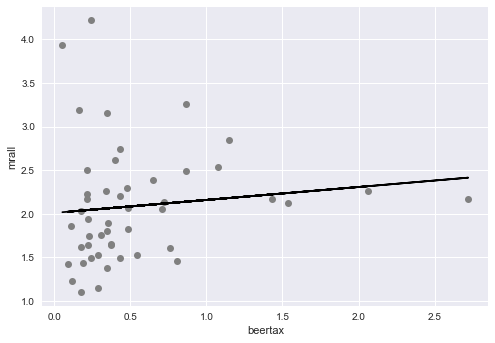

In [101]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

fatality=pd.read_stata('data/fatality.dta')

fatality_82=fatality[fatality['year']==1982]
display(fatality_82.year.unique())

reg_82 = smf.ols(formula='mrall ~ beertax',
                      data=fatality_82)
res_fat_82 = reg_82.fit()


plt.style.use('seaborn')
plt.plot('beertax', 'mrall', data=fatality_82, color='grey', marker='o', linestyle='')
plt.plot(fatality_82['beertax'],res_fat_82.fittedvalues, color='black', linestyle='-')
plt.ylabel('mrall')
plt.xlabel('beertax')

In [102]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

fatality=pd.read_stata('data/fatality.dta')

fatality_88=fatality[fatality['year']==1988]
display(fatality_88.year.unique())

reg_88 = smf.ols(formula='mrall ~ beertax',
                      data=fatality_88)
res_fat_88 = reg_88.fit()
    
print(f'res_fat_88.summary(): \n{res_fat_88.summary()}\n')

array([1988], dtype=int64)

res_fat_88.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  mrall   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     7.118
Date:                Thu, 17 Sep 2020   Prob (F-statistic):             0.0105
Time:                        11:29:06   Log-Likelihood:                -32.871
No. Observations:                  48   AIC:                             69.74
Df Residuals:                      46   BIC:                             73.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8591      0.

array([1988], dtype=int64)

Text(0.5, 0, 'beertax')

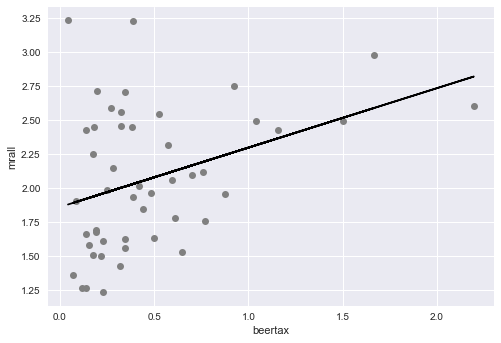

In [29]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

fatality=pd.read_stata('data/fatality.dta')

fatality_88=fatality[fatality['year']==1988]
display(fatality_88.year.unique())

reg_88 = smf.ols(formula='mrall ~ beertax',
                      data=fatality_88)
res_fat_88 = reg_88.fit()

plt.style.use('seaborn')
plt.plot('beertax', 'mrall', data=fatality_88, color='grey', marker='o', linestyle='')
plt.plot(fatality_88['beertax'],res_fat_88.fittedvalues, color='black', linestyle='-')
plt.ylabel('mrall')
plt.xlabel('beertax')

In [22]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

fatality=pd.read_stata('data/fatality.dta')
fatality_8288=fatality[(fatality['year']==1982) | (fatality['year']==1988)]

fatality_8288.head()

reg_8288 = smf.ols(formula='mrall ~ beertax',
                      data=fatality_8288)
res_fat_8288 = reg_8288.fit()
print(f'res_fat8288.summary(): \n{res_fat_8288.summary()}\n')

res_fat8288.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  mrall   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.552
Date:                Thu, 16 Sep 2021   Prob (F-statistic):             0.0355
Time:                        06:28:23   Log-Likelihood:                -83.748
No. Observations:                  96   AIC:                             171.5
Df Residuals:                      94   BIC:                             176.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9438      0

array([1982, 1988], dtype=int64)

Text(0.5, 0, 'beertax')

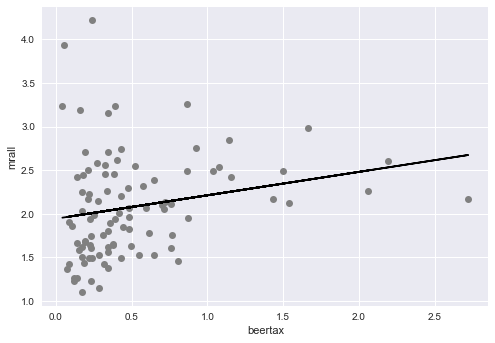

In [103]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

fatality=pd.read_stata('data/fatality.dta')

fatality_8288=fatality[(fatality['year']==1982) | (fatality['year']==1988)]
display(fatality_8288.year.unique())

reg_8288 = smf.ols(formula='mrall ~ beertax',
                      data=fatality_8288)
res_fat_8288 = reg_8288.fit()

plt.style.use('seaborn')
plt.plot('beertax', 'mrall', data=fatality_8288, color='grey', marker='o', linestyle='')
plt.plot(fatality_8288['beertax'],res_fat_8288.fittedvalues, color='black', linestyle='-')
plt.ylabel('mrall')
plt.xlabel('beertax')

In [104]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

fatality=pd.read_stata('data/fatality.dta')

reg_all = smf.ols(formula='mrall ~ beertax',
                      data=fatality)
res_fat_all = reg_all.fit()

print(f'res_fat_all.summary(): \n{res_fat_all.summary()}\n')

res_fat_all.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  mrall   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.552
Date:                Thu, 17 Sep 2020   Prob (F-statistic):             0.0355
Time:                        11:32:30   Log-Likelihood:                -83.748
No. Observations:                  96   AIC:                             171.5
Df Residuals:                      94   BIC:                             176.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9438      0

Text(0.5, 0, 'beertax')

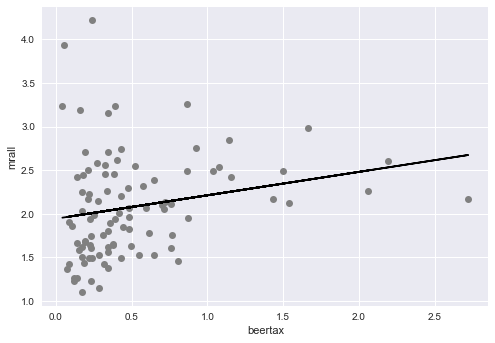

In [105]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

fatality=pd.read_stata('data/fatality.dta')

reg_all = smf.ols(formula='mrall ~ beertax',
                      data=fatality)
res_fat_all = reg_all.fit()

plt.style.use('seaborn')
plt.plot('beertax', 'mrall', data=fatality, color='grey', marker='o', linestyle='')
plt.plot(fatality['beertax'],res_fat_all.fittedvalues, color='black', linestyle='-')
plt.ylabel('mrall')
plt.xlabel('beertax')

In [106]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

fatality=pd.read_stata('data/fatality.dta')

fatality_82=fatality[fatality['year']==1982]
reg_82 = smf.ols(formula='mrall ~ beertax',
                      data=fatality_82)

fatality_88=fatality[fatality['year']==1988]
reg_88 = smf.ols(formula='mrall ~ beertax',
                      data=fatality_88)

fatality_8288=fatality[(fatality['year']==1982) | (fatality['year']==1988)]
reg_8288 = smf.ols(formula='mrall ~ beertax',
                      data=fatality_8288)

res_fat_8288 = reg_8288.fit()
reg_all = smf.ols(formula='mrall ~ beertax',
                      data=fatality)
res_fat_all = reg_all.fit()


output = summary_col([res_fat_82, res_fat_88, res_fat_8288, res_fat_all],stars=True,float_format='%0.6f',
                  model_names=['y82\n(1)','y88\n(2)','y8288\n(3)','yall\n(4)'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})
print(output)



              y82         y88        y8288        yall   
              (1)         (2)         (3)         (4)    
---------------------------------------------------------
Intercept 2.010381*** 1.859073*** 1.943759*** 1.943759***
          (0.139078)  (0.105989)  (0.087204)  (0.087204) 
beertax   0.148460    0.438755**  0.268473**  0.268473** 
          (0.188368)  (0.164454)  (0.125835)  (0.125835) 
N         48          48          96          96         
R2        0.01        0.13        0.05        0.05       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


**Panel Data**

- Should we conclude that an increase in the tax on beer leads to more traffic deaths?


**Panel Data**

- Should we conclude that an increase in the tax on beer leads to more traffic deaths?
- Not necessarily, because these regressions could have substantial omitted variable bias.
- Many factors affect the fatality rate:
    - the quality of the automobiles driven in the state,
    - whether the state highways are in good repair,
    - whether most driving is rural or urban,
    - the density of cars on the road,
    - and whether it is socially acceptable to drink and drive.

**Panel Data**

- Any of these factors may be correlated with alcohol taxes, and if so, this will lead to omitted variable bias.
- One approach to these potential sources of omitted variable bias would be to collect data on all these variables and add them to the annual cross-sectional regressions.
- Unfortunately, some of these variables, such as the cultural acceptance of drinking and driving, might be very hard or even impossible to measure.
- But: If these factors remain constant over time in a given state, however, then another route is available.
- Because we have panel data, we can, in effect, hold these factors constant even though we cannot measure them.
- To do so, we use OLS regression with **fixed effects**.

**Panel Data with Two Time Periods: "Before and After" Comparisons**

- When data for each state are obtained for $T = 2$ time periods, it is possible to compare values of the dependent variable in the second period to values in the first period.
- By focusing on changes in the dependent variable, this "before and after" or "differences" comparison, in effect, holds constant the unobserved factors that differ from one state to the next but do not change over time within the state.
- Let $Z_i$ be a variable that determines the fatality rate in the $i^th$ state but does not change over time (so the $t$ subscript is omitted).
- For example, $Z_i$ might be the local cultural attitude toward drinking and driving, which changes slowly and thus could be considered to be constant between 1982 and 1988.
- What else could be $Z_i$?



**Panel Data with Two Time Periods: "Before and After" Comparisons**
    
- Accordingly, the population linear regression relating $Z_i$ and the real beer tax to the fatality rate is

\begin{equation*}
FatalityRate_{it}=\beta_0+\beta_1BeerTax_{it}+\beta_2z_i+u_{it}
\end{equation*}

where $u_{it}$ is the error term, $i = 1,..,n$, and $t = 1,...,T$.

- Because $z_i$ does not change over time, in the regression model in it will not produce any change in the fatality rate between 1982 and 1988.
- Thus, in this regression model, the influence of $z_i$ can be eliminated by analyzing the change in the fatality rate between the two periods.


**Panel Data with Two Time Periods: "Before and After" Comparisons**

- To see this mathematically, consider the equation below for each of the two years 1982 and 1988:

\begin{equation*}
FatalityRate_{i1982}=\beta_0+\beta_1BeerTax_{i1982}+\beta_2z_i+u_{i1982}
\end{equation*}

\begin{equation*}
FatalityRate_{i1988}=\beta_0+\beta_1BeerTax_{i1988}+\beta_2z_i+u_{i1988}
\end{equation*}

Subtracting the second from the first equation eliminates the effect of $Z_i$:

\begin{equation*}
FatalityRate_{i1988}- FatalityRate_{i1982} =\beta_1(BeerTax_{i1988}-BeerTax_{i1982}+u_{i1988}-u_{i1982}
\end{equation*}

- This specification has an intuitive interpretation.
- Cultural attitudes toward drinking and driving affect the level of drunk driving and thus the traffic fatality rate in a state.
- If, however, they did not change between 1982 and 1988, then they did not produce any change in fatalities in the state.
- Rather: any changes in traffic fatalities over time must have arisen from other sources.
- In our model these are changes in the tax on beer and changes in the error term (which captures changes in other factors that determine traffic deaths).

**Panel Data with Two Time Periods: "Before and After" Comparisons**


- Specifying the regression in changes in the above equation eliminates the effect of the unobserved variables $z_i$ that are constant over time.
- In other words: analyzing changes in $y$ and $x$ has the effect of controlling for variables that are constant over time, thereby eliminating this source of omitted variable bias.
- Let's now estimate this first differenced estimator in Python.
- Before we can use the method `diff` to calculate first differences of the dependent variable **FatalityRate** (_mrall_) and the independent variable **BeerTax**, we have to make sure with `groupby ('id')` that these calculations are performed per individual.
- The FD estimator can now be calculated by simply applying OLS to these differenced values.
- The observations for the first year with missing information are automatically dropped from the estimation sample.


In [107]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
#remove a false positive warning
pd.options.mode.chained_assignment = None  # default='warn'

fatality=pd.read_stata('data/fatality.dta')

fatality_8288=fatality[(fatality['year']==1982) | (fatality['year']==1988)]

fatality_8288['t']=(fatality_8288['year']-1982)/6

# manually calculate first differences per entity for mrall and beertax
fatality_8288['mrall_diff1'] = \
    fatality_8288.sort_values(['state', 'year']).groupby('state')['mrall'].diff()
fatality_8288['beertax_diff1'] = \
    fatality_8288.sort_values(['state', 'year']).groupby('state')['beertax'].diff()
var_selection = ['state', 'year','t', 'mrall', 'beertax', 'mrall_diff1', 'beertax_diff1']
print(f'fatality_8288[var_selection].head(): \n{fatality_8288[var_selection].head()}\n')

# estimate FD model with statmodels on differenced data:
reg_sm = smf.ols(formula='mrall_diff1 ~beertax_diff1', data=fatality_8288)
results_sm = reg_sm.fit()

# print results:
table_sm = pd.DataFrame({'b': round(results_sm.params, 8),
                         'se': round(results_sm.bse, 4),
                         't': round(results_sm.tvalues, 4),
                         'pval': round(results_sm.pvalues, 4)})
print(f'table_sm: \n{table_sm}\n')


fatality_8288[var_selection].head(): 
  state  year    t    mrall   beertax  mrall_diff1  beertax_diff1
0    AL  1982  0.0  2.12836  1.539379          NaN            NaN
1    AL  1988  1.0  2.49391  1.501444      0.36555      -0.037936
2    AZ  1982  0.0  2.49914  0.214797          NaN            NaN
3    AZ  1988  1.0  2.70565  0.346487      0.20651       0.131690
4    AR  1982  0.0  2.38405  0.650358          NaN            NaN

table_sm: 
                      b      se       t    pval
Intercept     -0.072037  0.0606 -1.1879  0.2410
beertax_diff1 -1.040973  0.4172 -2.4950  0.0162



**Panel Data with Two Time Periods: "Before and After" Comparisons**

- Including an intercept allows for the possibility that the mean change in the fatality rate, in the absence of a change in the real beer tax, is nonzero.
- Any ideas why the sign could be negative?


**Panel Data with Two Time Periods: "Before and After" Comparisons**

- Including an intercept allows for the possibility that the mean change in the fatality rate, in the absence of a change in the real beer tax, is nonzero.
- For example, the negative intercept found could reflect improvements in auto safety between 1982 and 1988 that reduced the average fatality rate.
- Generating the differenced values and using OLS on them is actually unnecessary.
- The command `FirstDifferenceOLs` shows that many lines of code can be saved by using the canned routine in `linearmodels`.
- As the output shows, the parameter estimates are therefore exactly the same as our manual calculations.

In [30]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import linearmodels as plm
import matplotlib.pyplot as plt
#remove a false positive warning
pd.options.mode.chained_assignment = None  # default='warn'

fatality=pd.read_stata('data/fatality.dta')

fatality_8288=fatality[(fatality['year']==1982) | (fatality['year']==1988)]

fatality_8288['t']=(fatality_8288['year']-1982)/6

# estimate FD model with linearmodels:
fatality_8288 = fatality_8288.set_index(['state', 'year'])
reg_plm = plm.FirstDifferenceOLS.from_formula(formula='mrall ~t+beertax',
                                              data=fatality_8288)
results_plm = reg_plm.fit()

# print results:
table_plm = pd.DataFrame({'b': round(results_plm.params, 8),
                          'se': round(results_plm.std_errors, 4),
                          't': round(results_plm.tstats, 4),
                          'pval': round(results_plm.pvalues, 4)})
print(f'table_plm: \n{table_plm}\n')

table_plm: 
                b      se       t    pval
t       -0.016068  0.0263 -0.6106  0.5444
beertax -0.405223  0.1810 -2.2384  0.0301



**Panel Data with Two Time Periods: "Before and After" Comparisons**

- In contrast to the cross-sectional regression results, the estimated effect of a change in the real beer tax is negative, as predicted by common sense.
- The hypothesis that the population slope coefficient is 0 is rejected at the 5% significance level.
- According to this estimated coefficient, an increase in the real beer tax by \\$1 per case reduces the traffic fatality rate by 1.04 deaths per 10,000 people.
- This estimated effect is very large: The average fatality rate is approximately 2 in these data (that is, 2 fatalities per year
per 10,000 members of the population), so the estimate suggests that traffic fatalities can be cut in half merely by increasing the real tax on beer by $1 per case.
- Let's just check out of curiosity if a log specification of beer tax shows the same

**Panel Data with Two Time Periods: "Before and After" Comparisons**

- By examining changes in the fatality rate over time, the regression  controls for fixed factors such as cultural attitudes toward drinking and driving.
- But there are many factors that influence traffic safety, and if they change over time and are correlated with the real beer tax, then their omission will produce omitted variable bias.
- Later, we undertake a more careful analysis that controls for several such factors, so for now it is best to refrain from drawing any substantive conclusions about the effect of real beer taxes on traffic fatalities.
- This “before and after” or “differences” analysis works when the data are observed in two different years.
- Our data set, however, contains observations for seven different years, and it seems foolish to discard those potentially useful additional data.
- But the “before and after” method does not apply directly when $T>2$.
- To analyze all the observations in our panel data set, we use the method of **fixed effects regression**.

**Fixed Effects Regression**

- Fixed effects regression is a method for controlling for omitted variables in panel data when the omitted variables vary across entities (states) but do not change over time.
- Unlike the “before and after” comparisons, fixed effects regression can be used when there are two or more time observations for each entity.
- The fixed effects regression model has n different intercepts, one for each entity.
- These intercepts can be represented by a set of binary (or indicator) variables.
- These binary variables absorb the influences of all omitted variables that differ from one entity to the next but are constant over time.

**The Fixed Effects Regression Model**

- Consider a regression model with the dependent variable (FatalityRate) and observed regressor (BeerTax) denoted as $y_{it}$ and $X_{it}$, respectively:

\begin{equation*}
y_{it}=\beta_0+\beta_1x_{it}+\beta_2z_i+u_{it}
\end{equation*}

- $z_i$ is an unobserved variable that varies from one state to the next but does not change over time (for example, $z_i$ represents cultural attitudes toward drinking and driving).
- We want to estimate $\beta_1$, the effect on $y$ of $x$, holding constant the unobserved state characteristics $z$.
- Because $z_i$ varies from one state to the next but is constant over time, the population regression model above can be interpreted as having $n$ intercepts, one for each state.
- Specifically, let $\alpha_i = \beta_0 + \beta_2z_i$.
- Then the equation becomes

\begin{equation*}
y_{it}=\beta_1x_{it}+\alpha_i+u_{it}
\end{equation*}

**The Fixed Effects Regression Model**

- The above equation is the fixed effects regression model, in which $\alpha_1,...,\alpha_n$ are treated as unknown intercepts to be estimated, one for each state.
- The interpretation of $\alpha_i$ as a state-specific intercept comes from considering the population regression line for the $i^{th}$ state; this population regression line is $\alpha_i + \beta_1x_{it}$.
- The slope coefficient of the population regression line, $\beta_1$, is the same for all states, but the intercept of the population regression line varies from one state to the next.
- Because the intercept $\alpha_i$ i can be thought of as the “effect” of being in entity $i$ (in the current application, entities are states), the terms $\alpha_1,...,\alpha_n$ are known as **entity fixed effects**.
- The variation in the entity fixed effects comes from omitted variables that, like $z_i$, vary across entities but not over time.

**The Fixed Effects Regression Model**

- The state-specific intercepts in the fixed effects regression model also can be expressed using binary variables to denote the individual states:


\begin{equation*}
y_{it}=\beta_0+\beta_1x_{it}+\gamma_2D2_i+\gamma_3D3_i+...+\gamma_nDn_i+u_{it}
\end{equation*}

where $\beta_0, \beta_1,\gamma_2,\gamma_3,...,\gamma_n$ are unknown coefficients to be estimated. 
- Note that the we left out one entitity due to collinearity (remember the dummy variable trap from the men and women case).
- Now let's estimate the fixed effects models with dummies on the full data set on road fatalities and plot the corresponding graph.

In [111]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf


fatality=pd.read_stata('data/fatality.dta')

reg_dummies = smf.ols(formula='mrall ~ beertax + C(state)',
                      data=fatality)
res_dummies = reg_dummies.fit()

# print results:
table_dummies = pd.DataFrame({'b': round(res_dummies.params, 8),
                          'se': round(res_dummies.bse, 4),
                          't': round(res_dummies.tvalues, 4),
                          'pval': round(res_dummies.pvalues, 4)})
#print(f'table_dummies: \n{table_dummies}\n')

print(f'res_dummies.summary(): \n{res_dummies.summary()}\n')

res_dummies.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  mrall   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     7.996
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           2.24e-11
Time:                        14:23:58   Log-Likelihood:                 20.325
No. Observations:                  96   AIC:                             57.35
Df Residuals:                      47   BIC:                             183.0
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3

Text(0.5, 0, 'beertax')

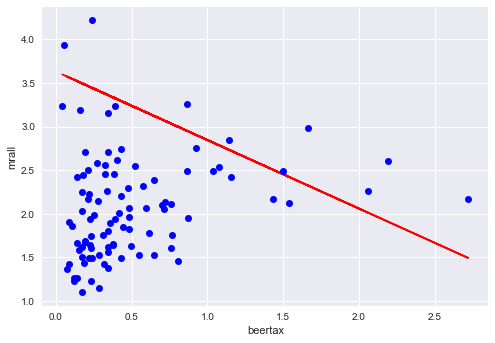

In [112]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

fatality=pd.read_stata('data/fatality.dta')

reg_dummies = smf.ols(formula='mrall ~ beertax + C(state)',
                      data=fatality)
res_dummies = reg_dummies.fit()

plt.style.use('seaborn')
plt.plot(fatality.beertax, res_dummies.params[0] + res_dummies.params[1] * fatality.beertax, 'r')
plt.plot(fatality.beertax, fatality.mrall ,'b', marker='o', linestyle='')
plt.ylabel('mrall')
plt.xlabel('beertax')

**The Fixed Effects Regression Model**

- Sometimes you have a really large number of entities and estimating a parameter may be very time-consuming.
- Regression software typically computes the OLS fixed effects estimator in two steps:

    - In the first step, the entity-specific average is subtracted from each variable.
    - In the second step, the regression is estimated using “entity-demeaned” variables.
    
    
- "Entitiy-demeaned" variables means that for each variable you subtract its mean per entity from the original value (e.g. $y_{it}-\bar{y_i}$ and  $x_{it}-\bar{x_i}$).
- Running an OLS regression on the entitiy demeaned variables produces the same results as the dummy variable approach but it's faster as it doesn't require estimating all parameters.
- This is called the **within transformation** of the data and allows to get rid of the unobserved individual effecct $\alpha_i$:

\begin{equation*}
y_{it}=\beta_1x_{it}+\alpha_i+u_{it}
\end{equation*}

\begin{equation*}
\bar{y}_{i}=\beta_1\bar{x}_{i}+\alpha_i+\bar{u}_{i}
\end{equation*}

\begin{equation*}
\tilde{y}_{it}=y_{it}-\bar{y}_{i}=\beta_1\tilde{x}_{it}+\tilde{u}_{it}
\end{equation*}



**The Fixed Effects Regression Model**

- In Python we can simply use `PanelOLS` in the module `linearmodels`.
- Demeaning is considered by adding the word `EntityEffects` to the formula.
- You have to define the panel data structure before running the fixed effects regression by setting entity and time dimension of the panel data (`fatality.set_index(['state', 'year']` in this case)
- When you ue fixed effects, variables that do not vary over time are dropped (for instance a state law)
- You can either remove such variables manually or use `drop_absorbed=True`

In [113]:
import wooldridge as woo
import pandas as pd
import linearmodels as plm

fatality=pd.read_stata('data/fatality.dta')
fatality = fatality.set_index(['state', 'year'], drop=False)

# FE model estimation:
reg = plm.PanelOLS.from_formula(
    formula='mrall ~ beertax + EntityEffects',
    data=fatality, drop_absorbed=True)
results = reg.fit()

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.std_errors, 4),
                      't': round(results.tstats, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

#print(results)

table: 
              b     se       t    pval
beertax -0.8689  0.393 -2.2111  0.0319



**Regression with Time Fixed Effects**

- Including state fixed effects in the fatality rate regression lets us avoid omitted variables bias arising from omitted factors, such as cultural attitudes toward drinking and driving, that vary across statesbut are constant over time within a state.
- What are such potentially time-varying factors?

**Regression with Time Fixed Effects**

- Still, a skeptic might suspect that other factors could lead to omitted variables bias.
- For example:
    - over this period cars were getting safer,
    - occupants were increasingly wearing seat belts;
    - if the real tax on beer rose, on average, during the mid-1980s, then BeerTax could be picking up the effect of overall automobile safety improvements.
- If, however, safety improvements evolved over time but were the same for all states, then we can eliminate their influence by including **time fixed effects**.

**Regression with Time Fixed Effects**

- Just as fixed effects for each entity can control for variables that are constant over time but differ across entities
- So time fixed effects can control for variables that are **constant across entities but evolve over time**.
- Because safety improvements in new cars are introduced nationally, they serve to reduce traffic fatalities in all states.
- So it is plausible to think of automobile safety as an omitted variable that changes over time but has the same value for all states.
- The population regression can be modified to make explicit the effect of automobile safety, which we will denote $s_t$:

\begin{equation*}
y_{it} = \beta_0 + \beta_1x_{it} + \beta_2z_i + \beta_3s_t + u_{it}, \end{equation*}

where $s_t$ is unobserved and where the single $t$ subscript emphasizes that safety changes over time but is constant across states.
- Because $\beta_3s_t$ represents variables that determine $y_{it}$ if $s_t$ is correlated with $x_{it}$, then omitting $s_t$ from the regression leads to omitted variable bias.

**Regression with Time Fixed Effects**

- Our objective is to estimate $\beta_1$, controlling for $s_t$.
- Although $S_t$ is unobserved, its influence can be eliminated because it varies over time but not across states, just as it is possible to eliminate the effect of $z_i$, which varies across states but not over time.
- In the entity fixed effects model, the presence of $z_i$ leads to the fixed effects regression model, in which each state has its own intercept (or fixed effect).
- Similarly, because $s_t$ varies over time but not over states, the presence of $s_t$ leads to a regression model in which each time period has its own intercept.
- The **time fixed effects regression model** with a single $x$ regressor is

\begin{equation*}
y_{it} = \beta_0 + \beta_1x_{it} + \lambda_t + u_{it}, \end{equation*}

**Regression with Time Fixed Effects**

- This model has a different intercept, $\lambda_t$, for each time period.
- The intercept $\lambda_t$ can be thought of as the “effect” on $y$ of year $t$ (or, more generally,time period t), so the terms $\lambda_1,...,\lambda_T$, are known as **time fixed effects**.
- The variation in the time fixed effects comes from omitted variables that, like $s_t$, vary over time but not across entities.
- Just as the entity fixed effects regression model can be represented using $n - 1$ binary indicators, so, too, can the time fixed effects regression model be represented using $T - 1$ binary indicators:

\begin{equation*}
y_{it} = \beta_0 + \beta_1x_{it} + \gamma_2B2_t+...+\gamma_TBT_t + u_{it},
\end{equation*}

where $\gamma_2,...,\gamma_T$ are unknown coefficients and where $B2_t = 1$ if $t$ = 2 and $B2_t = 0$ otherwise, and so forth.
- Let's estimate the fatality model with both, time and entitiy fixed effects now.

In [32]:
import wooldridge as woo
import pandas as pd
import linearmodels as plm

fatality=pd.read_stata('data/fatality.dta')
fatality = fatality.set_index(['state', 'year'], drop=False)

# FE model estimation with time fixed effects:
reg = plm.PanelOLS.from_formula(
    formula='np.log(mrall) ~ beertax + EntityEffects + TimeEffects',
    data=fatality, drop_absorbed=True)
results = reg.fit()

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.std_errors, 4),
                      't': round(results.tstats, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

#print(results)

table: 
              b     se       t    pval
beertax -0.4052  0.181 -2.2384  0.0301



**The Fixed Effects Regression Assumptions and Standard Errors for Fixed Effects Regression**

- In panel data, the regression error can be correlated over time within an entity.
- Like heteroskedasticity, this correlation does not introduce bias into the fixed effects estimator, but it affects the variance of the fixed effects estimator, and therefore it affects how one computes standard errors.
- What are the consequences if standard errors not computed correctly?
- The standard errors for fixed effects regressions reported now are so-called clustered standard errors, which are robust both to heteroskedasticity and to correlation over time within an entity. 
- We begin with the fixed effects regression assumptions, which extend the least squares regression assumptions for causal inference to panel data
- Under these assumptions, the fixed effects estimator is consistent and asymptotically normally distributed when $n$ is large.

**The Fixed Effects Regression Assumptions and Standard Errors for Fixed Effects Regression**

- The fixed effects assumption for causal inference, are similar to those for cross-sectional data
- However, the conditional mean assumption for the errors term $u_{it}$ is now:

\begin{equation*}
E(u_{it}|x_{i1},x_{i2},...,x_{iT},\alpha_i)=0
\end{equation*}

- In other words, the assumption is that the error term has conditional mean 0 given all $T$ values of $x$ for that entity
- This implies that there is no omitted variable bias
- The requirement that the conditional mean of $u_{it}$ not depend on any of the values of $x$ for that entity — past, present, or future — adds an important subtlety beyond the least squares assumption for cross-sectional data.
- This assumption is violated if current $u_{it}$ is correlated with past, present, or future values of $x$.


**The Fixed Effects Regression Assumptions and Standard Errors for Fixed Effects Regression**

- Another assumption for cross-sectional data was that the sample is produced by random sampling from the population
- This can ertainly not hold for fixed effects models as we need to sample the variables per entity
- Thus, the assumption is reduced to random sampling of entities
- This means: the random sampling assumption for fixed effects models allows $x_{it}$ to be correlated over time within an entitity
- If $x_{it}$ is correlated with $x_{is}$ for different values of $s$ and $t$ — that is, if $x_{it}$ is correlated over time for a given entity — then $x_{it}$ is said to be **autocorrelated** (correlated with itself, at different dates) or **serially correlated**.
- Autocorrelation is a pervasive feature of time series data: What happens one year tends to be correlated with what happens the next year.
- In the traffic fatality example, $x_{it}$, do you think the beer tax in state $i$ in year $t$, is autocorrelated? 


**The Fixed Effects Regression Assumptions and Standard Errors for Fixed Effects Regression**

- Yes, in the traffic fatality example, $x_{it}$, the beer tax in state $i$ in year $t$, is autocorrelated:
    - Most of the time the legislature does not change the beer tax, so if it is high one year relative to its mean value for state i, it will tend to be high the next year, too.
- Similarly, it is possible to think of reasons why $u_{it}$ would be autocorrelated.
- Recall that $u_{it}$ consists of time-varying factors that are determinants of $y_{it}$ but are not included as regressors, and some of these omitted factors might be autocorrelated.
- Can you think of examples that make $u_{it}$ autocorrelated?
- Think about local factors that affect $y_{it}$ for more than one period but are not captured in the model


**The Fixed Effects Regression Assumptions and Standard Errors for Fixed Effects Regression**

- For example, a downturn in the local economy might produce layoffs and diminish commuting traffic, thus reducing traffic fatalities for 2 or more years.
- Similarly, a major road improvement project might reduce traffic accidents not only in the year of completion but also in future years.
- Such omitted factors, which persist over multiple years, produce autocorrelated regression errors.
- Not all omitted factors will produce autocorrelation in $u_{it}$
- Can you think of an example that affects $y_{it}$ but does not produce autocorrelated error terms?

**The Fixed Effects Regression Assumptions and Standard Errors for Fixed Effects Regression**


- For example, severe winter driving conditions plausibly affect fatalities, but if winter weather conditions for a given state are independently distributed from one year to the next, then this component of the error term would be serially uncorrelated.
- In general, though, as long as some omitted factors are autocorrelated, then $u_{it}$ will be autocorrelated.

**Standard Errors for Fixed Effects Regression**


- If the regression errors are autocorrelated, then the usual heteroskedasticity-robust standard error formula for cross-section regression is not valid.
- One way to see this is to draw an analogy to heteroskedasticity.
- In a regression with cross-sectional data, if the errors are heteroskedastic, then the homoskedasticity-only standard errors are not valid because they were derived under the false assumption of homoskedasticity.
- Similarly, if the errors are autocorrelated, then the usual standard errors will not be valid because they were derived under the false assumption of no serial correlation.
- Standard errors that are valid if $u_{it}$ is potentially heteroskedastic and potentially correlated over time within an entity are referred to as **heteroskedasticity-and autocorrelation-robust (HAR) standard errors**.
- The HAR standard errors most commonly used are so called **clustered standard errors**.

**Standard Errors for Fixed Effects Regression**

- The term clustered arises because these standard errors allow the regression errors to have an arbitrary correlation within a cluster, or grouping, but assume that the regression errors are uncorrelated across clusters. In the context of panel data, each cluster consists of an entity.
- Thus clustered standard errors allow for heteroskedasticity and for arbitrary autocorrelation within an entity but treat the errors as uncorrelated across entities.
- That is, clustered standard errors allow for heteroskedasticity and autocorrelation in a way that is consistent with the fixed effects assumption of only having random sampling of entitities.
- Like heteroskedasticity-robust standard errors in regression with cross-sectional data, clustered standard errors are valid whether or not there is heteroskedasticity, autocorrelation, or both.
- If the number of entities $n$ is large, inference using clustered standard errors can proceed using the usual large-sample normal critical values for t-statistics

In [33]:
import wooldridge as woo
import pandas as pd
import linearmodels as plm

fatality=pd.read_stata('data/fatality.dta')
fatality = fatality.set_index(['state', 'year'], drop=False)

# FE model estimation with and without clustering:
reg = plm.PanelOLS.from_formula(
    formula='mrall ~ beertax  +  EntityEffects+TimeEffects',
    data=fatality, drop_absorbed=True)


results_noclust = reg.fit()
results_clust = reg.fit(cov_type='clustered',cluster_entity=True)

# print regression table:
table = pd.DataFrame({'b': round(results_noclust.params, 4),
                      'se_noclust': round(results_noclust.std_errors, 4),
                      'se_clust': round(results_clust.std_errors, 4),
                      'pval_noclust': round(results_noclust.pvalues, 4),
                      'pval_clust': round(results_clust.pvalues, 4)})
print(f'table: \n{table}\n')

#print(results)

table: 
             b  se_noclust  se_clust  pval_noclust  pval_clust
beertax -1.041      0.4172    0.5021        0.0162      0.0438



<h2>Instrumental Variable Regression</h2>

- We have discussed the problem of omitting an important variable, which results ina violation of the zero conditional mean assumption (i.e. violates  $E(u_i|x_i)=0)$
- We explained how fixed effects estimation or first differencing can be used with panel data to estimate the effects of time-varying independent variables in the presence of _time-constant_ omitted variables.
- Although such methods are very useful, we do not always have access to panel data.
- And even if we can have panel data, we still may have problems.
- In which cases does it not help to use a fixed effects estimation?

**Instrumental Variable Regression**

- We may be interested in the effect of a variable that does not change over time: first differencing or fixed effects estimation eliminates time-constant explanatory variables.
- Also: the panel data methods that we have studied so far do not solve the problem of time-varying omitted variables that are correlated with the explanatory variables.
- If a direct solution to these problems is either infeasible or unavailable, a new method is required.

**Instrumental Variable Regression**

- **Instrumental variables (IV) regression** is a general way to obtain a consistent estimator of the unknown causal coefficients when the regressor, $x$, is correlated with the error term, $u$.
- To understand how IV regression works, think of the variation in $x$ as having two parts:
    - one part that, for whatever reason, is correlated with $u$ (this is the part that causes the problems) and
    - a second part that is uncorrelated with $u$.
- If you had information that allowed you to isolate the second part, you could focus on those variations in $x$ that are uncorrelated with $u$ and disregard the variations in $x$ that bias the OLS estimates.



**Instrumental Variable Regression**


- This is, in fact, what IV regression does.
- The information about the movements in $x$ that are uncorrelated with $u$ is gleaned from one or more additional variables, called **instrumental variables** or simply **instruments**.
- Instrumental variables regression uses these additional variables as tools or "instruments" to isolate the movements in $x$ that are uncorrelated with $u$
- This permits consistent estimation of the regression coefficients.


**Instrumental Variable Regression**

- We start with the case of a single regressor, $x$, which might be correlated with the error, $u$.
- If $x$ and $u$ are correlated, the OLS estimator is inconsistent; that is, it may not be close to the true value of the causal coefficient even when the sample is very large.
- This correlation between $x$  and $u$ can stem from omitted variables but not only.
- Another reason could be **simultaneous causality** (when causality runs “backward” from $y$ to $x$ as well as “forward” from $x$ to $y$).
- Whatever the source of the correlation between $x$ and $u$, if there is a valid instrumental variable, $z$, the effect on $y$ of a unit change in $x$ can be estimated using the **instrumental variables estimator**.

**Instrumental Variable Regression**

**Endogeneity and exogeneity**

- Instrumental variables regression has some specialized terminology to distinguish variables that are correlated with the population error term $u$ from ones that are not:
    - variables correlated with the error term are called **endogenous variables**, while 
    - variables uncorrelated with the error term are called **exogenous variables**.

**Instrumental Variable Regression**

- To illustrate endogeneity and exogeneity consider a model

\begin{equation*}
y=\beta_0+\beta_1x_i+u_i
\end{equation*}

- We can use OLS to get consistent estimates if

<img src="figs\ols_unbiased.png" width="300"/>

- We can't use OLS if

<center> <img src="figs\ols_biased_1.png" alt="drawing" width="300"/> or <img src="figs\ols_biased_2.png" alt="drawing" width="300"/> </center>



**Refreshing the Omitted Variable Bias Problem**

- We have had the example of the effect of eduction on wages
- The problem is, that both education and wages, are also affected by a persons ability, intelligence and effort.
- However, ability, intelligence and effort are usually not observed and thus cannot be included in the regression model.
- The effect we measure for education is thus not isolated: it's a combination of education and all the things that effect both, education and wages
- Thus, we only measure a correlation between wages and education but not the causal effect of wages on education
- Let's show how this causes a bias again in the simulation, we've had before
- We will build up on this simulation also to show how instrument variables solve this problem after that.

**Simulating Omitted Variable Bias**

- Consider a model $y=\beta_0+\beta_{1}x_1+\beta_{2}x_2+u$ 
- Assume there is a common component $a$ affecting $x_1$ and $x_2$ 
- Assume $\beta_0$ = 1, $\beta_1$=-0.3 and $\beta_2$=0.7


In [58]:
# generate some random variables with the above characteristics
import pandas as pd
import numpy as np
from numpy.random import seed
from numpy.random import rand
from numpy.random import randn

# generate a random common component for x1 and x2
# seed random number generator
seed(1)
a = randn(10000)

# generate x1 and x2
seed(1)
x1 = randn(10000)+a
x2 = randn(10000)-3+a

# generate random error
e = randn(10000)

# generate y
y = 1 - 0.3*x1 + 0.7*x2 + e

# generate dataframe
df = pd.DataFrame({'Y' : y, 'X1': x1, 'X2':x2,'e':e})
df.head()


,Y,X1,X2,e
0,-2.954861,3.248691,-1.498129,-1.931564
1,-1.161883,-1.223513,-3.383587,-0.160426
2,-2.231650,-1.056344,-3.880477,-0.832220
3,-1.994796,-2.145937,-4.903522,-0.206112
4,-0.169967,1.730815,-2.395682,1.026255


We first estimate the unbiased model $\hat{y}=\hat{\beta}_0+\hat{\beta}_1x_1+\hat{\beta}_2x_2+\hat{u}$

In [59]:
# estimate unbiased OLS model
import statsmodels.formula.api as smf    
import statsmodels.api as sm

formula = "y ~ x1 + x2 "
results = smf.ols(formula, df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     2569.
Date:                Thu, 16 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:48:36   Log-Likelihood:                -14149.
No. Observations:               10000   AIC:                         2.830e+04
Df Residuals:                    9997   BIC:                         2.832e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9960      0.031     31.740      0.0

Now we assume we don't observe $x_2$ and instead estimate

\begin{equation*}
\tilde{y}=\tilde{\beta}_0+\tilde{\beta}_1x_1
\end{equation*}

In [60]:
#estimate biased OLS model

formula = "y ~ x1"
results = smf.ols(formula, df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     91.77
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           1.21e-21
Time:                        13:48:39   Log-Likelihood:                -16176.
No. Observations:               10000   AIC:                         3.236e+04
Df Residuals:                    9998   BIC:                         3.237e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1082      0.012    -90.834      0.0

Let's now compare the two regression
  - the one where omitted variable $x_2$ that is correlated with our variable of interested and the dependent variable and
  - the other one where $x_2$ is also included

In [61]:
#compare the two 
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

formula = "y ~ x1 + x2"
reg1 = smf.ols(formula, df).fit()
formula = "y ~ x1"
reg2 = smf.ols(formula, df).fit()

dfoutput = summary_col([reg1,reg2],stars=True,float_format='%0.2f',
                  model_names=['y\n(1)','y\n(2)'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})
print(dfoutput)


             y        y    
            (1)      (2)   
---------------------------
Intercept 1.00***  -1.11***
          (0.03)   (0.01)  
x1        -0.30*** 0.06*** 
          (0.01)   (0.01)  
x2        0.70***          
          (0.01)           
N         10000    10000   
R2        0.34     0.01    
Standard errors in
parentheses.
* p<.1, ** p<.05, ***p<.01


**Note:** The bias of the parameter of interest is not introduced because a variable that affects $y$ is omitted in the regression model!

The bias results because the missing (unobserved) variable is correlated with one of the $x$ variables!

- Now consider a model $y=\beta_0+\beta_{1}x_1+\beta_{2}x_2+\beta_{3}x_3+u$ 
- Assume $\beta_1$ = 1, $\beta_1$=-0.3 and $\beta_2$=0.7 AND $\beta_3$=0.5
- Again assume that $x_1$ and $x_2$ are correlated but uncorrelated with $x_3$
- Though $x_3$ affects $y$ omitting it does not introduce a bias
- Not necessarily important to put everything into the model that affects $y$, that's not the issue

In [62]:
# generate x3 which is uncorrelated to x1 and x2
seed(1)
x1 = randn(10000)+a
x2 = randn(10000)-3+a
x3 = randn(10000)
e = randn(10000)

# adjust y
y = 1 - 0.3*x1 + 0.7*x2 - 0.4*x3 + e

# generate dataframe
df = pd.DataFrame({'y' : y, 'x1': x1, 'x2':x2,'x3':x3,'e':e})

In [63]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

formula = "y ~ x1"
reg1 = smf.ols(formula, df).fit()
formula = "y ~ x1 + x3"
reg2 = smf.ols(formula, df).fit()
formula = "y ~ x1 + x2 + x3"
reg3 = smf.ols(formula, df).fit()
formula = "y ~ x1 + x2"
reg4 = smf.ols(formula, df).fit()

dfoutput = summary_col([reg1,reg2,reg3,reg4],stars=True,float_format='%0.2f',
                  model_names=['y\n(0)','y\n(1)','y\n(2)','y\n(3)'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})
print(dfoutput)


             y        y        y        y    
            (0)      (1)      (2)      (3)   
---------------------------------------------
Intercept -1.07*** -1.08*** 1.01***  1.01*** 
          (0.01)   (0.01)   (0.03)   (0.03)  
x1        0.05***  0.05***  -0.30*** -0.30***
          (0.01)   (0.01)   (0.01)   (0.01)  
x2                          0.70***  0.70*** 
                            (0.01)   (0.01)  
x3                 -0.39*** -0.39***         
                   (0.01)   (0.01)           
N         10000    10000    10000    10000   
R2        0.01     0.10     0.39     0.30    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


**Instrumental Variable Regression**



- Again consider a model $y=\beta_0+\beta_{1}x_1+\beta_{2}x_2+u$ 
- Again assume that $x_1$ and $x_2$ are correlated (maybe because a component $a$ affects both, $x_1$ and $x_2$)
- In addition assume that there is a further component $z$ that affects $x_1$ but is uncorrelated to $x_2$ such that

\begin{equation*}
 x_1=\gamma_0+\gamma_{1}a+\gamma_{2}z+e
 \end{equation*}

- If $\gamma_2$ is sufficiently large we can isolate this **exogenous variation** in $x_{1}$ to identify $\beta_{1}$
- We then say $z$ is an **instrument** for $x_{1}$

**Instrumental Variable Regression: Requirements for an Instrument**

There ae two conditions for an instrument to work:

- **Relevance:** Instrument has to be sufficiently strong correlated with the endogenous regressor (must not be a _weak_ instrument) in order to cause enough variation in the endogenous variable to identify it

<center>$Cov(z,x_1)\neq 0$</center>

- **Exogeneity**: Instrument has to be uncorrelated with the error term

<center>$Cov(z_i,u_i)= 0$</center>

<p>

<center> <img src="figs\instr_req.png" width="400"/> </center>

**Instrumental Variable Regression: Two Stage Least Squares Estimation**

- If the instrument $z$ satisfies the conditions of instrument relevance and exogeneity, the coefficient $\beta_1$ can be estimated using an IV estimator called **two stage least squares (TSLS)**.
- As the name suggests, the two stage least squares estimator is calculated in two stages:
    - The first stage decomposes $x_1$ into two components: a problematic component that may be correlated with the regression error and another, problem-free component that is uncorrelated with the error.
    - The second stage uses the problem-free component to estimate $\beta_1$.


**Instrumental Variable Regression: Two Stage Least Squares Estimation**

- First stage: Estimate $x_{1}=\gamma_0 + \gamma_1z$ (ALL coviariates that are used in the main estimation have to be included in this step!)
- Save $\hat{x}_{1}$, the first stage estimate of $x_{1} $
- Regress $y=\beta_0+\beta_{1}\hat{x}_{1}+u$ 
- Note $z$ only appears in the first stage, not in the second stage
- This is called the **exclusion restriction**

**Deriving the IV estimator**

Recall the OLS estimator is

<p>
    
$\hat{\beta}_{OLS}=\frac{\sum{(Y_i-\bar{Y})(X_i-\bar{X})}}{\sum{({X_i}-\bar{X})^2}}$

Hence
    
<p>
    
$\hat{\beta}_{2SLS}=\frac{\sum{(Y_i-\bar{Y})(\hat{X_i}-\bar{\hat{X}})}}{\sum{(\hat{X_i}-\bar{\hat{X}})^2}}$

<p>
    
If we substitute
    
<p>
    
$\hat{X_i}-\bar{\hat{X}}=(\hat{\gamma}_{0}+\hat{\gamma}_{1}Z_i)-(\hat{\gamma}_{0}+\hat{\gamma}_{1}\bar{Z})=\hat{\gamma}_{1}(Z_i-\bar{Z})$
    
<p>
    
we get

<p>
    
$\frac{\sum{(Y_i-\bar{Y})\hat{\gamma}_{1}(Z_i-\bar{Z})}}{\sum{\hat{\gamma}_{1}^2({Z_i}-\bar{Z})^2}}=\frac{1}{\hat{\gamma}_{1}}\times \frac{\sum{(Y_i-\bar{Y})(Z_i-\bar{Z})}}{\sum{({Z_i}-\bar{Z})^2}}$

<p>
    
Since $\hat{\gamma}_{1}$ is the first stage OLS estimator

<p>
    
$\hat{\beta}_{2SLS}=\frac{\sum{({Z_i}-\bar{Z})^2}}{\sum{(X_i-\bar{X})(Z_i-\bar{Z})}}\times\frac{\sum{(Y_i-\bar{Y})(Z_i-\bar{Z})}}{\sum{({Z_i}-\bar{Z})^2}}$

<p>
    
Which gives the instrumental variable estimator

<p>
$\hat{\beta}_{IV}=\frac{\sum{(Y_i-\bar{Y})(Z_i-\bar{Z})}}{\sum{({X_i}-\bar{X})({Z_i}-\bar{Z})}}$


**Consistence of the IV estimator**

$\hat{\beta}_{IV}=\frac{\sum{(Y_i-\bar{Y})(Z_i-\bar{Z})}}{\sum{({X_i}-\bar{X})({Z_i}-\bar{Z})}}$

<p>
    
In large samples the IV estimator converges to

<p>
    
$plim(\hat{\beta}_{IV})=\frac{Cov(Y_i,Z_i)}{Cov(X_i,Z_i)}=\frac{Cov(\beta_0+\beta_1X_i+u_i,Z_i)}{Cov(X_i,Z_i)}=\beta_1+\frac{Cov(u_i,Z_i)}{Cov(X_i, Z_i)}$

<p>
    
and if the two IV assumptions
<p>
$Cov(Z_i,X_i)\neq 0$
<p>
and
<p>
$Cov(Z_i,u_i)= 0$
<p>
hold, we get:

<p>
    
$plim(\hat{\beta}_{IV})=\beta_1$

**Bias of the IV estimator**

$E[\hat{\beta}_{IV}]=E[\frac{\sum{(Y_i-\bar{Y})(Z_i-\bar{Z})}}{\sum{(X_i-\bar{X})(Z_i-\bar{Z})}}]$

<p>

$=E[\frac{\sum{((\beta_0+\beta_1X_i+u_i)-(\beta_0+\beta_1\bar{X}+\bar{u}))(Z_i-\bar{Z})}}{\sum{(X_i-\bar{X})(Z_i-\bar{Z})}}]$

<p>

$=E[\frac{\beta_1\sum{(X_i-\bar{X})(Z_i-\bar{Z})+\sum{(u_i-\bar{u})(Z_i-}\bar{Z})}}{\sum{(X_i-\bar{X})(Z_i-\bar{Z})}}]$

<p>
          
=$\beta_1+E[\frac{\sum{(u_i-\bar{u})(Z_i-\bar{Z})}}{\sum{(X_i-\bar{X})(Z_i-\bar{Z})}}]$=$\beta_1+E[\frac{\sum{u_i(Z_i-\bar{Z})}}{\sum{(X_i-\bar{X})(Z_i-\bar{Z})}}]$

<p>
          
=$\beta_1+E_{X,Z}[\frac{\sum{E[u_i|Z_i,X_i](Z_i-\bar{Z})}}{\sum{(X_i-\bar{X})(Z_i-\bar{Z})}}$

<p>
                  
$\neq \beta_1$ 

<p>
                  
Instrument exogeneity implies $E[u_i|Z_i]=0$ but not $E[u_i|Z_i,X_i]= 0$ (this would mean that $E[u_i|X_i]=0$ and we wouldn't need an instrument!)

**IV by hand**

- Assume we don't observe $x_{2}$ but we observe the instrument $z$
- Estimate $\hat{\beta}_1$ by 2SLS and compare with results from the true relationship and from the estimation suffering from endogeneity


In [64]:
# generate a random component for x1 and x2
a = randn(10000)

# generate a component that only affects x1 (the instrument)
z = randn(10000)

# generate x1 and x1
seed(1)
x1 = randn(10000) + a - 0.3*z
x2 = randn(10000) - 3 + a

# generate random error
e = randn(10000)

# generate y
y = 1 - 0.3*x1 + 0.7*x2 + e

# generate dataframe
df = pd.DataFrame({'Y' : y, 'X1': x1, 'X2':x2,'e':e, 'Z':z})
df.head()

,Y,X1,X2,e,Z
0,-3.424977,2.542691,-2.472294,-1.931564,-0.893885
1,-1.656629,-2.265136,-4.536777,-0.160426,-0.371890
2,-1.086400,1.704233,-1.061301,-0.832220,0.195330
3,-1.148969,0.628252,-2.506260,-0.206112,-1.256424
4,-0.251322,1.626178,-2.556748,1.026255,-0.188097


In [65]:
#first stage regression
reg1 = smf.ols(formula='x1 ~ z', data=df).fit()
df['x1_hat'] = reg1.fittedvalues
print(reg1.summary())
#df.head()

                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     539.0
Date:                Thu, 16 Sep 2021   Prob (F-statistic):          3.60e-116
Time:                        13:48:59   Log-Likelihood:                -17717.
No. Observations:               10000   AIC:                         3.544e+04
Df Residuals:                    9998   BIC:                         3.545e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0084      0.014      0.593      0.5

In [66]:
reg_iv = smf.ols(formula='y ~ x1_hat', data=df).fit()

reg_real = smf.ols(formula='y ~ x1+x2', data=df).fit()

reg_endog = smf.ols(formula='y ~ x1', data=df).fit()

dfoutput = summary_col([reg_real,reg_endog,reg_iv],stars=True,float_format='%0.2f',
                  model_names=['y\n(real)','y\n(endog)','y\n(iv)'])
print(dfoutput)


             y        y        y    
           (real)  (endog)    (iv)  
------------------------------------
Intercept 1.00***  -1.11*** -1.11***
          (0.03)   (0.01)   (0.01)  
x1        -0.30*** 0.04***          
          (0.01)   (0.01)           
x1_hat                      -0.29***
                            (0.04)  
x2        0.70***                   
          (0.01)                    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [67]:
reg1 = smf.ols(formula = 'x1 ~ z', data = df).fit()
exog = df['exog'] = reg1.fittedvalues

reg2 = smf.ols(formula = 'x1 ~ a', data = df).fit()
endog = df['endog'] = reg2.fittedvalues

#df.describe()

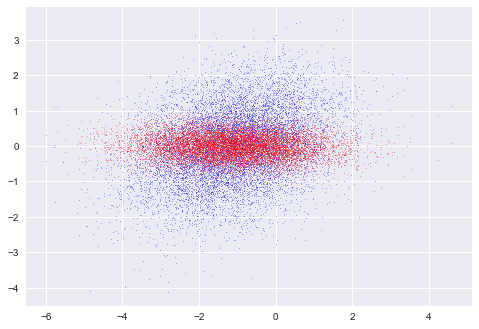

In [68]:
import matplotlib.pyplot as plt
plt.scatter(y,endog, c = 'blue', s = 0.1)
plt.scatter(y,exog, c = 'red', s = 0.1)

**IV in Python**

- To implement IV regression in _Python_, the module `linearmodels` offers the command `IV2SLS` including the convenient formula syntax we know from `statsmodels`.
- When working with IV regression in `linearmodels`, our first line of code is:

```python
import linearmodels.iv as iv
```
- In the formula specification, the endogenous regressor(s) $x_{end}$ and instruments $z$ are provided in the following way:

```python
y ~ 1 + [ x_end ~ z ]
```

- Also remember that constants in `linearmodels` must be explicitly included by adding "1" to the formula.

In [69]:
import wooldridge as woo
import numpy as np
import pandas as pd
import linearmodels.iv as iv
import statsmodels.formula.api as smf

#Iv manually (from before)
reg_iv_manually = smf.ols(formula='y ~ x1_hat',
                          data=df)
results_iv_manually=reg_iv_manually.fit()

# IV automatically:
reg_iv = iv.IV2SLS.from_formula(formula='y ~ 1 + [x1 ~ z]',
                                data=df)
results_iv = reg_iv.fit()

# print regression table:
table_iv = pd.DataFrame({'b_man': round(results_iv_manually.params, 4),
                         'se_man': round(results_iv_manually.bse, 4),
                         't_man': round(results_iv_manually.tvalues, 4),
                         'b_auto': round(results_iv.params, 4),
                         'se_auto': round(results_iv.std_errors, 4),
                         't_auto': round(results_iv.tstats, 4)})
print(f'table_iv: \n{table_iv}\n')

table_iv: 
            b_man  se_man    t_man  b_auto  se_auto   t_auto
Intercept -1.1091  0.0131 -84.4016 -1.1091    0.014 -78.9810
x1            NaN     NaN      NaN -0.2935    0.043  -6.8318
x1_hat    -0.2935  0.0398  -7.3799     NaN      NaN      NaN



**Standard Errors of 2SLS Estimation**

- Standard errors are too small when we estimate 2SLS by hand (wrong inference, overestimate significance)
- What is the cause?
- Problem: We did not correct for the fact that $\hat{x}_1$ is an estimate, i.e. there is additional uncertainty in the second stage
- Procedure to correct standard errors is complicated but some packages like `linearmodels.iv` do the job
- Practical 'quick and dirty' way to get asymptotically correct standard errors if we do IV by hand is to **bootstrap** standard errors, i.e. use the empirical distribution of the s.e. to get an estimate of the population's distribution s.e.

> <ol> <li> draw random samples with replacement repeatedly from the sample dataset </li>
> <li> estimate the standard errors corresponding to these bootstrap samples, which forms the sampling distribution of the s.e. </li>
> <li> calculate the sample standard deviation of the sampling distribution </li></ol>

**Relevant Instruments**

- Recall: One requirement for IV is to have a relevant instrument, so that $Cov(Z_i,X_i)\neq 0$

- If the instrument is _weak_ this means its correlation with the endogenous variable may be to low to get useful estimates of the endogenous variable
- The IV estimator can be severaly biased then.
- As an exercise estimate 2SLS models where the instrument's relevance varies  using the model characteristics from before.

- Estimate IV for different $\gamma_2$ = 0.01, 0.05, 0.1, 0.3 and 0.6

In [70]:
#Estimate IV models instruments of different strengths

#instrument with gamma=0.01
x1 = randn(10000) + a - 0.01*z
y = 1 - 0.3*x1 + 0.7*x2 + e
reg_iv_001  = iv.IV2SLS.from_formula (formula='y ~ 1 + [x1 ~ z]', data=df).fit()

#instrument with gamma=0.05
x1 = randn(10000) + a - 0.05*z
y = 1 - 0.3*x1 + 0.7*x2 + e
reg_iv_005  = iv.IV2SLS.from_formula (formula='y ~ 1 + [x1 ~ z]', data=df).fit()

#instrument with gamma=0.1
x1 = randn(10000) + a - 0.1*z
y = 1 - 0.3*x1 + 0.7*x2 + e
reg_iv_01   = iv.IV2SLS.from_formula (formula='y ~ 1 + [x1 ~ z]',  data=df).fit()

#instrument with gamma=0.3
x1 = randn(10000) + a - 0.3*z
y = 1 - 0.3*x1 + 0.7*x2 + e
reg_iv_03   = iv.IV2SLS.from_formula (formula='y ~ 1 + [x1 ~ z]',  data=df).fit()

#instrument with gamma=0.6
x1 = randn(10000) + a - 0.6*z
y = 1 - 0.3*x1 + 0.7*x2 + e
reg_iv_06   = iv.IV2SLS.from_formula (formula='y ~ 1 + [x1 ~ z]',  data=df).fit()

In [71]:
# print regression table:
table_weak_iv = pd.DataFrame({'b_real_model': round(reg_real.params, 4),
                         'se_real_model': round(reg_real.bse, 4),
                         'b_endog_model': round(reg_endog.params, 4),
                         'se_endog_model': round(reg_endog.bse, 4),
                         'b_iv_1': round(reg_iv_001.params, 4),
                         'se_iv_1': round(reg_iv_001.std_errors, 4),
                         'b_iv_2': round(reg_iv_005.params, 4),
                         'se_iv_2': round(reg_iv_005.std_errors, 4),
                         'b_iv_3': round(reg_iv_01.params, 4),
                         'se_iv_3': round(reg_iv_01.std_errors, 4),
                         'b_iv_4': round(reg_iv_03.params, 4),
                         'se_iv_4': round(reg_iv_03.std_errors, 4),
                         'b_iv_5': round(reg_iv_06.params, 4),
                         'se_iv_5': round(reg_iv_06.std_errors, 4)})

print(f'table_iv_weak: \n{table_weak_iv}\n')

table_iv_weak: 
           b_real_model  se_real_model  b_endog_model  se_endog_model  b_iv_1  \
Intercept        0.9998         0.0264        -1.1110          0.0132 -1.1108   
x1              -0.2957         0.0079         0.0418          0.0090 -0.1838   
x2               0.7048         0.0082            NaN             NaN     NaN   

           se_iv_1  b_iv_2  se_iv_2  b_iv_3  se_iv_3  b_iv_4  se_iv_4  b_iv_5  \
Intercept   0.0172 -1.1090   0.0138 -1.1091   0.0141 -1.1090   0.0141 -1.1091   
x1          0.7409 -0.2656   0.2224 -0.3024   0.0159 -0.2928   0.0476 -0.2965   
x2             NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   

           se_iv_5  
Intercept   0.0141  
x1          0.0233  
x2             NaN  



**Weak Instruments**

- Fortunately, you can test for weak instruments
- The most common test is the first-stage f-test of the instrument(s)
- By rule of thumb one can say that the instrument is sufficiently strong/relevant to identify the endogenous variable if the first-stage f-statistic is larger than 10 
- The (partial) first stage f-statistic can be computed (among some other first-stage statistics) in _Python_ with the post-estimation command 

```python
regression_name.first_stage
```

Let's check the first-stage statistics for the our simulations where our instrument was only weakly correlated with $x_1$ and where it was sufficiently strong.

In [82]:
#instrument with gamma=0.1

x1 = randn(10000) + a - 0.1*z
y = 1 - 0.3*x1 + 0.7*x2 + e
reg_iv_001   = iv.IV2SLS.from_formula (formula='y ~ 1 + [x1 ~ z]',  data=df).fit()
print(reg_iv_001.first_stage)

    First Stage Estimation Results    
                                    x1
--------------------------------------
R-squared                       0.0062
Partial R-squared               0.0062
Shea's R-squared                0.0062
Partial F-statistic             62.567
P-value (Partial F-stat)     2.554e-15
Partial F-stat Distn           chi2(1)
========================== ===========
Intercept                       0.0278
                              (1.9827)
z                              -0.1106
                             (-7.9099)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


In [73]:
#instrument with gamma=0.3
seed(1)
x1 = randn(10000) + a - 0.3*z
y = 1 - 0.3*x1 + 0.7*x2 + e
reg_iv_03   = iv.IV2SLS.from_formula (formula='y ~ 1 + [x1 ~ z]',  data=df).fit()
print(reg_iv_03.first_stage)

    First Stage Estimation Results    
                                    x1
--------------------------------------
R-squared                       0.0512
Partial R-squared               0.0512
Shea's R-squared                0.0512
Partial F-statistic             530.81
P-value (Partial F-stat)        0.0000
Partial F-stat Distn           chi2(1)
========================== ===========
Intercept                       0.0084
                              (0.5929)
z                              -0.3288
                             (-23.039)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


**Validity of the Instruments**

- In contrast to the relevance (strenght) of the instrument, which is testable, we can't test the second assumption regarding the validity (exogeneity) of the instrument
- We have to justify the validity by arguments and theory

**Control Functions**

- IV does not work in models that are non-linear in parameters (e.g. discrete choice models such a sprobit and logit, count data models, semiparametric)
- In this case **control functions** can serve as an alternative
- The control function method use a similar identifying assumptions as IV methods
- Procedure is:
> <ol><li> Estimate first stage as before</li>
> <li> Store the first stage residuals</li>
> <li> Estimate the second stage but use the ednogenous variable (not its estimate) and add the first stage residuals as ``control function"</li></ol>
- Sometimes also called **Two Stage Residual Inclusion** method (2SRI) 

In [84]:
###Control function method###

#first stage regression
seed(1)
a=randn(10000)
#instrument with gamma=0.3
x1 = rand(10000) + a - 0.3*z
y = 1 - 0.3*x1 + 0.7*x2 + e

first_stage = smf.ols(formula='x1 ~ z', data=df).fit()
df['fs_res'] = first_stage.resid

#second stage with control function
control_function = smf.ols(formula='y ~ x1 + fs_res', data=df).fit()
print(control_function.summary())
#df.head()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     233.5
Date:                Thu, 16 Sep 2021   Prob (F-statistic):          7.41e-100
Time:                        14:07:19   Log-Likelihood:                -17606.
No. Observations:               10000   AIC:                         3.522e+04
Df Residuals:                    9997   BIC:                         3.524e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1124      0.026    -42.805      0.0

- In the case of endogeneity in a non-linear model you simply estimate the first-stage as you do in 2SLS, you then store the residuals and plug them into the second stage of your non-linear model and estimate it by OLS (probit , logit, count data model, semiparametric model).
- Standard errors are corrected by Bootstraping.

**Simultaneity/Reverse causality**

- As we mentioned already, omitted variable bias is not the only source of potential endogeneity.
-  Endogeneity can also arise from **two-way causality**:

\begin{equation*}
y_i=\beta_0+\beta_1x_{1,i}+\beta_2x_{2,i} +u_{1,i}
\end{equation*}

\begin{equation*}
x_{1,i}=\gamma_0+\gamma_1y_i+\gamma_2c_i+u_{2,i}
\end{equation*}

    
- A shock in $u_{1,i}$ affects $y_i$ and as $y_i$ affects $x_{1,i}$ it also affects $x_{1,i}$
- Because of the reverse casuality of $y_i$ and $x_{1,i}$ we have $E(u_{i}|x_{i})\neq 0$
- For instance demand-supply relation: firms ask for higher prices if there is more demand and consumers buy less if prices are high
- But we only observe the market equilibrium outcome


**Illustration of Simultaneity Bias**

- We are interested in estimating the demand elasticity for wine.

\begin{equation*}
ln(Q_i^{Wine})=\beta_0+\beta_1ln(P_i^{Wine})+u
\end{equation*}

where $Q_i^{wine}$ is the $i^{th}$ observation on the quantity of wine consumed, $P_i^{wine}$ is its price, and $u_i$ represents other factors that affect demand, such as income and consumer tastes.  

- A 1% increase in the price of wine causes approximately a $\beta_1$ percent change in demand, so $\beta_1$ is the demand elasticity.
- But because of the interactions between supply and demand, the regressor, $ln(P_i^{Wine})$ is likely to be correlated with the error term.





Let's assume the following:  


- In the first period’s equilibrium price and quantity are determined by their intersection.
- In year 2, demand increases (say, because of an increase in income), and supply decreases (because of an increase in the cost of producing wine);
- The equilibrium price and quantity are determined by the intersection of the new supply and demand curves.
- In year 3, the factors affecting demand and supply change again; demand increases again, supply increases, and quantity and price are determined in a new equilibrium.

<p>

<center> <img src="figs\wine_1.png" width="400"/> </center>

<p>

<center> <img src="figs\wine_2.png" width="400"/> </center>

- The figure shows the equilibrium quantity and price pairs for these three periods and for eight subsequent years, where in each year the supply and demand curves are subject to shifts associated with factors other than price that affect market supply and demand.

- Fitting a line to these points by OLS will estimate neither a demand curve nor a supply curve because the points have been determined by changes in both demand and supply.

- A way to get around this problem was to find some third variable that shifts supply but does not shift demand - an exogenous instrument!

- Then we can identify the demand curve.

- In the case of wine this may be for instance weather conditions that shift the grape harvest (reduces supply).

<p>

<center> <img src="figs\wine_3.png" width="400"/> </center>

**Instruments are not always intuitive:**
    
    
- Assume we want to estimate the effect of the number of children on the participation of women in the labor market.
- Why can't we simply regress participation in the labor market on the number of kids?
- Do you have any idea why a dummy variable indicating whether a women with two children has two children of the same gender could be an instrument for the number of children?

- Assume we want to know the effect of education on earnings.
- Why can't we simply regress earnings on education?
- Why could it be that the quarter of birth is a reasonable instrument for education?

https://www.google.com/search?q=Does+Compulsory+School+Attendance+Affect+Schooling+and+Earnings%3F&rlz=1C1CHBF_deFR818FR818&oq=Does+Compulsory+School+Attendance+Affect+Schooling+and+Earnings%3F&aqs=chrome..69i57.491j0j7&sourceid=chrome&ie=UTF-8

**Some examples for IV:**

**Size of police forces and level of crime**

- At the beginning we asked the question: Does the presence of more police officers on the street deter crime?
- We already argued that we would need an experiment to analyze this in an causal way

What was the argument for this again and why can't we just do an experiment?



**Size of police forces and level of crime**

- We have endogeneity because the size of the police force and the leve of crime are determined simultaneity:


more crime $\rightarrow$ more police, more police $\rightarrow$ less crime).

- An experiment which randomizes the size of the police force is morally problematic, so that does not work.

But: we sometimes have "natural experiments"!



<p>

<center> <img src="graphs\levitt_crime_paper.jpg" width="600"/> </center>

- In the paper "Using Electoral Cycles in Police Hiring to Estimate the Effect of Police on Crime" Steven Levitt used an IV to adress the endogeneity.
- He first shows, that the size of police forces increases disproportionally in mayoral and governatorial election years.
- As elections are regularly and are not linked to crime, he used election years as an instrument for the size of the police force.
- Using this IV he showed that each additional police officer is estimated to eliminate eight to ten serious crimes.
- Existing estimates of the costs of crime suggest that the social benefit of reduced crime is approximately $100,000 per officer per year, implying that the current number of police is below the optimal level.

http://pricetheory.uchicago.edu/levitt/Papers/LevittUsingElectoralCycles2002.pdf

**Juvenile Incarceration, Human Capital, and Future Crime: Evidence from Randomly Assigned Judges**. Anna Aizer, Joseph J. Doyle, Jr.

- In this paper the authors were interested in the effect of juvenile incarcernation on future outcomes such as high school completion and adult recidivism of these kids.
- Why didn't they just simply regress future outcomes (high school completion and adult recidivism) on juvenile incarcernation?


**Juvenile Incarceration, Human Capital, and Future Crime: Evidence from Randomly Assigned Judges**. Anna Aizer, Joseph J. Doyle, Jr.

- To overcome endogeneity problems here the authors used dummies for each of the judges that handled the cases as instruments
- Do you have any idea why this instrument can make sense?



**Juvenile Incarceration, Human Capital, and Future Crime: Evidence from Randomly Assigned Judges**. Anna Aizer, Joseph J. Doyle, Jr.


a) the instrument is probably valid as judges are randomly assigned to a case

<p>

<center> <img src="figs\judges_random.png" width="400"/> </center>



**Juvenile Incarceration, Human Capital, and Future Crime: Evidence from Randomly Assigned Judges**. Anna Aizer, Joseph J. Doyle, Jr.

b) The instrument is relevant: judges differ in their incarceration tendency 


<p>

<center> <img src="figs\judges.png" width="400"/> </center>



**Juvenile Incarceration, Human Capital, and Future Crime: Evidence from Randomly Assigned Judges**. Anna Aizer, Joseph J. Doyle, Jr.

Thus: the judge assigned for a case can be used as an instrumental variable to estimate causal effects of juvenile incarceration on high school completion and adult recidivism.
- They find that juvenile incarceration results in substantially lower high school completion rates and higher adult incarceration rates, including for violent crimes. 

https://www.researchgate.net/publication/272413343_Juvenile_Incarceration_Human_Capital_and_Future_Crime_Evidence_from_Randomly-Assigned_Judges/link/5729f96b08ae2efbfdbc11bd/download

**Estimating the Payoff to Schooling Using the Vietnam-Era Draft Lottery**
Joshua D. Angrist, Alan B. Krueger

- Between 1970 and 1973 priority for military service was randomly assigned to draft-age men in a series of lotteries.
- Many men who were at risk of being drafted managed to avoid military service by enrolling in school and obtaining an educational deferment.
- The authors use the draft lottery as an instrument to estimate the return to education.
- They find that an extra year of schooling acquired in response to the lottery is associated with 6.6 percent higher weekly earnings.

https://sites.duke.edu/niou/files/2011/06/Angrist_lifetime-earningsmall.pdf


- Let's assume we want to estimate the effect of price on electricity generation
- Any ideas about a potential instrument for electricity price?
- Now assume we want to estimate the effect of electricity consumption on the price
- Any idea about a potential instrument for electricity demand?

**Direct versus Indirect Colonial Rule in India: Long-term Consequences**

What is the IV in this paper? How is it justified? What do you think about it?

https://www.hbs.edu/ris/Publication%20Files/05-041_1feff996-f50e-4e5a-b057-e0119cd19a62.pdf

**INSIDE THE FAMILY FIRM: THE ROLE OF FAMILIES IN SUCCESSION DECISIONS AND PERFORMANCE**


What is the IV in this paper? How is it justified? What do you think about it?

http://www.kaspermeisnernielsen.com/iff_qje.pdf

Another example:

    
**Economic Shocks and Civil Conflicts**
    
http://web.mit.edu/14.773/www/conflict_15apr03.pdf